# Import dataset, definizione funzioni e costanti

In [63]:
import numpy as np
from datetime import datetime
import matplotlib.pyplot as plt
import seaborn as sns
import os
import pandas as pd
import calendar

In [64]:
fields_sum = ["L1", "L2", "L3"]
L1 = ["P_CabinePower_L1", "P L1 WS Emergency Light", "P L1 WS Light", "P L1 WS FanCoil", "P L1 WS FM"]
L2 = ["P_HeatPump", "P L2 WS Emergency Light", "P L2 WS Light", "P L2 WS FanCoil", "P L2 WS FM"]
L3 = ["P_CabineLight_L3", "P L3 WS Emergency Light", "P L3 WS Light", "P L3 WS FanCoil", "P L3 WS FM"]

In [65]:
plot_path = "Plot"
dataset_path = os.path.join("..", "Preprocessing", "Dataset", "dataset.csv")
df_loads = pd.read_csv(dataset_path, index_col="Time")
df_sum_loads = pd.DataFrame()
df_sum_loads["L1"] = df_loads[L1].sum(axis=1)
df_sum_loads["L2"] = df_loads[L2].sum(axis=1)
df_sum_loads["L3"] = df_loads[L3].sum(axis=1)
df_loads.index = pd.to_datetime(df_loads.index)
df_sum_loads.index = pd.to_datetime(df_sum_loads.index)

In [66]:
counter = 0
def make_path(base_path, file_name):
    global counter
    counter += 1
    file_name = str(counter) + "-" + file_name  
    return os.path.join(base_path, file_name)

# Analisi minimi, massimi, media e deviazione standard

In [67]:
df_sum_loads.describe().round(decimals=2)

L1        L2        L3
count  18264.00  18264.00  18264.00
mean    1572.84   1731.27   1318.37
std      703.13    460.92    368.03
min      653.28    860.71    752.02
25%     1151.57   1391.96   1049.41
50%     1357.50   1643.47   1219.60
75%     1756.26   2019.24   1490.35
max     5806.24   3817.15   3027.08

In [68]:
rounded_describe = df_loads.describe().round(decimals=2)
display(rounded_describe[L1])
display(rounded_describe[L2])
display(rounded_describe[L3])

P_CabinePower_L1  P L1 WS Emergency Light  P L1 WS Light  \
count          18264.00                 18264.00       18264.00   
mean              84.75                   552.65         275.19   
std                6.83                   281.49          17.70   
min               73.15                   151.92         247.10   
25%               82.27                   357.71         262.96   
50%               83.32                   464.08         268.08   
75%               84.37                   711.80         276.26   
max              144.37                  1500.00         350.00   

       P L1 WS FanCoil  P L1 WS FM  
count         18264.00    18264.00  
mean             13.57      646.69  
std              30.47      498.61  
min               0.00       78.83  
25%               0.00      388.33  
50%               0.00      506.08  
75%               1.88      701.44  
max             165.12     4000.00

P_HeatPump  P L2 WS Emergency Light  P L2 WS Light  P L2 WS FanCoil  \
count    18264.00                 18264.00       18264.00         18264.00   
mean       232.54                   714.21         296.79             0.00   
std        222.28                   281.95          35.60             0.00   
min          5.42                   238.83         210.00             0.00   
25%          8.92                   547.02         254.82             0.00   
50%        198.90                   660.02         293.38             0.00   
75%        396.92                   856.33         338.54             0.00   
max        985.00                  1694.17         379.92             0.08   

       P L2 WS FM  
count    18264.00  
mean       487.73  
std        186.25  
min          7.89  
25%        416.86  
50%        463.33  
75%        553.17  
max       1300.00

P_CabineLight_L3  P L3 WS Emergency Light  P L3 WS Light  \
count          18264.00                 18264.00       18264.00   
mean               2.85                   374.63         307.75   
std                2.45                   115.00          15.59   
min                0.00                   211.59         250.00   
25%                0.05                   304.45         307.32   
50%                2.87                   348.17         309.11   
75%                5.46                   432.59         317.72   
max                6.69                   983.46         350.00   

       P L3 WS FanCoil  P L3 WS FM  
count         18264.00    18264.00  
mean             23.07      610.08  
std              41.17      307.91  
min               0.00      200.00  
25%               0.00      375.41  
50%               0.00      518.58  
75%              25.85      777.68  
max             195.96     2000.00

# Distribuzione valori

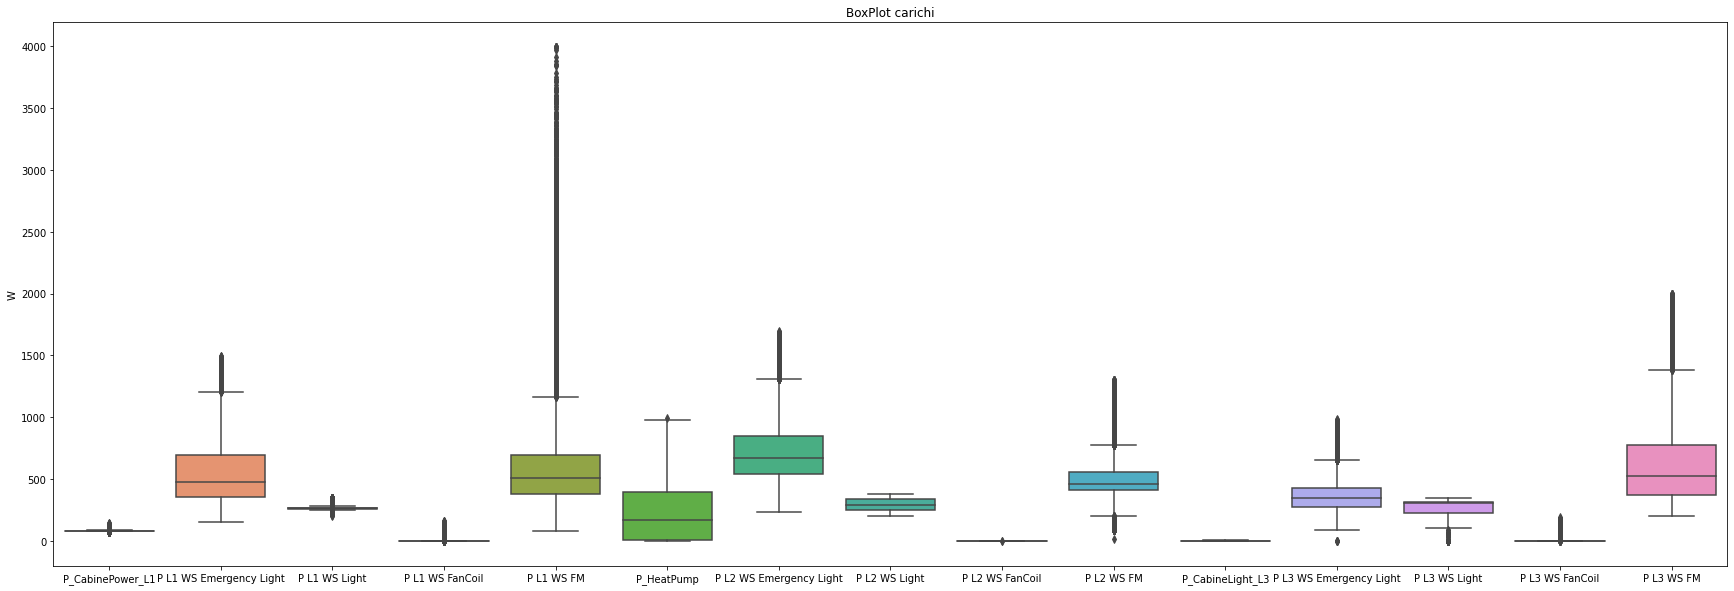

In [7]:
fields = L1 + L2 + L3
title = "BoxPlot carichi"

plt.figure(figsize=(30,10)) 

plt.title(title)
plt.ylabel("W")

data_for_plot = [df_loads[item] for item in fields]
sns.boxplot(data=data_for_plot)

plt.xticks(list(range(0,len(fields))), fields)

file_name = "".join(title.lower()).replace(" ", "_")
path = make_path(plot_path, file_name)
plt.savefig(path, bbox_inches='tight', transparent=True)

plt.show()

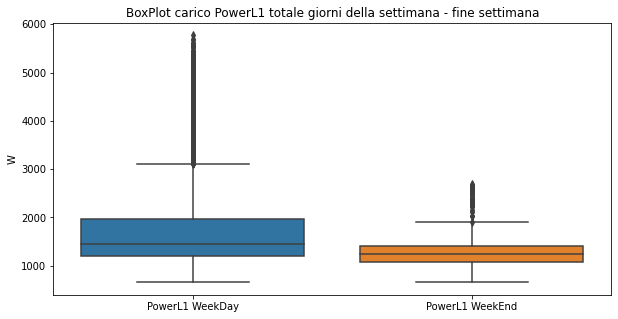

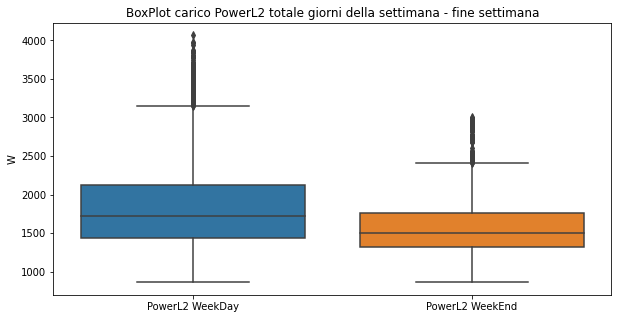

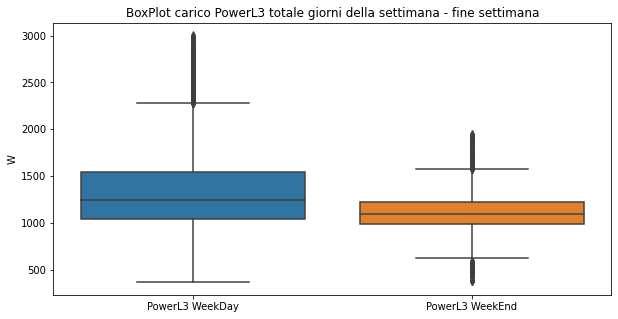

In [8]:
df_weekday = df_sum_loads[df_sum_loads.index.weekday < 5]
df_weekend = df_sum_loads[df_sum_loads.index.weekday >= 5]

for field in fields_sum:
    plt.figure(figsize=(10,5)) 
    
    title = "BoxPlot carico " + field + " totale giorni della settimana - fine settimana"
    plt.title(title)
    plt.ylabel("W")

    data_for_plot = [df_weekday[field], df_weekend[field]]
    sns.boxplot(data=data_for_plot)

    plt.xticks([0,1], [field+" WeekDay", field+" WeekEnd"])

    file_name = "".join(title.lower()).replace(" ", "_")
    path = make_path(plot_path, file_name)
    plt.savefig(path, bbox_inches='tight', transparent=True)

    plt.show()

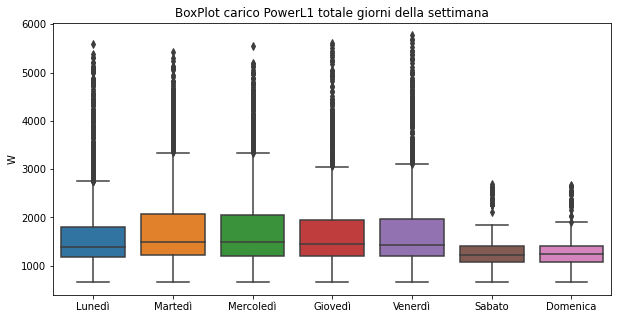

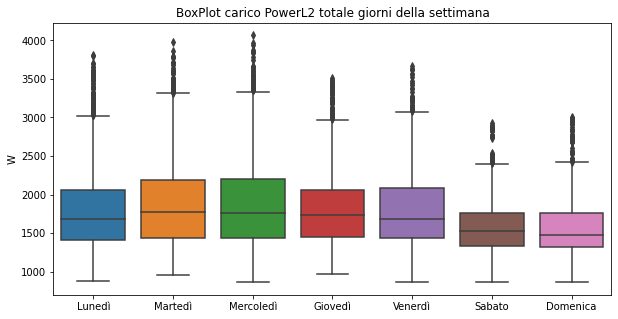

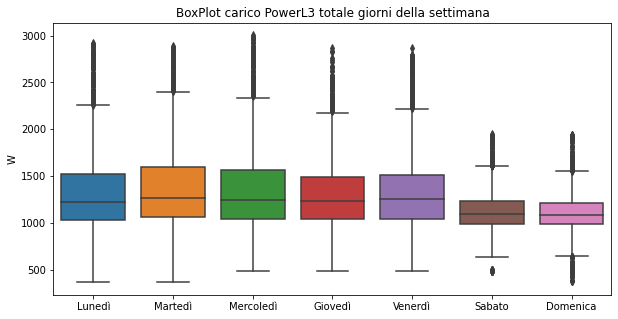

In [9]:
for field in fields_sum:
    plt.figure(figsize=(10,5)) 

    title = "BoxPlot carico " + field + " totale giorni della settimana"
    plt.title(title)
    plt.ylabel("W")

    data_for_plot = [df_sum_loads[df_sum_loads.index.weekday == i][field] for i in range(0,7)]
    sns.boxplot(data=data_for_plot)

    plt.xticks([0,1,2,3,4,5,6], ["Lunedì", "Martedì", "Mercoledì", "Giovedì", "Venerdì", "Sabato", "Domenica"])

    file_name = "".join(title.lower()).replace(" ", "_")
    path = make_path(plot_path, file_name)
    plt.savefig(path, bbox_inches='tight', transparent=True)

    plt.show()

# Plot curve di carico

In [69]:
def plot_distribution(df, fields, start_point, end_point, dim, title, xlabel, ylabel):
    
    df_tmp = df.loc[start_point:end_point]
    
    plt.figure(figsize=dim) 
    plt.grid()
    
    plt.title(title)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    
    for field in fields:
        plt.plot(df_tmp.index, df_tmp[field], linewidth="2", label=field)
    
    plt.xticks(rotation=45)
    
    plt.legend()
    
    file_name = "".join(title.lower()).replace(" ", "_")
    path = make_path(plot_path, file_name)
    plt.savefig(path, bbox_inches='tight', transparent=True)
    plt.show()

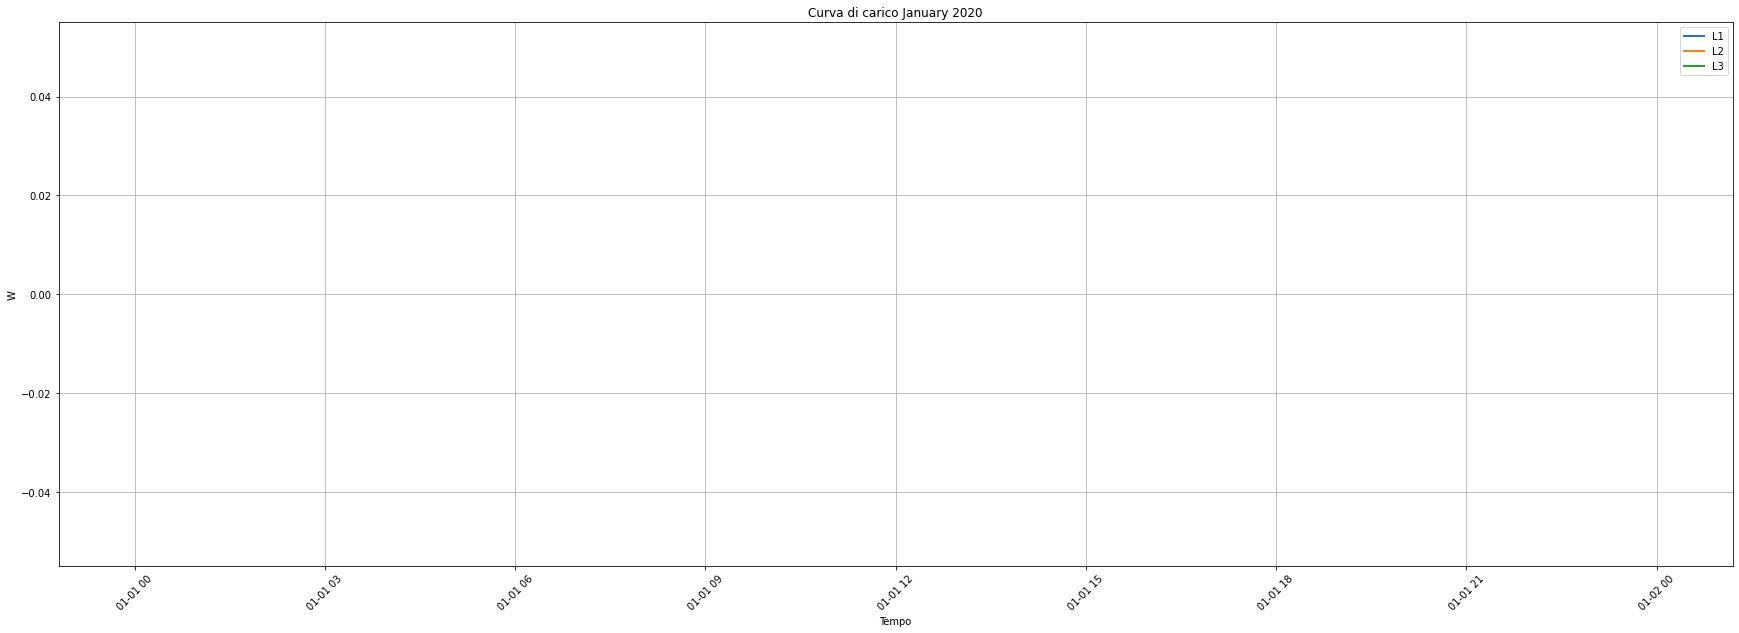

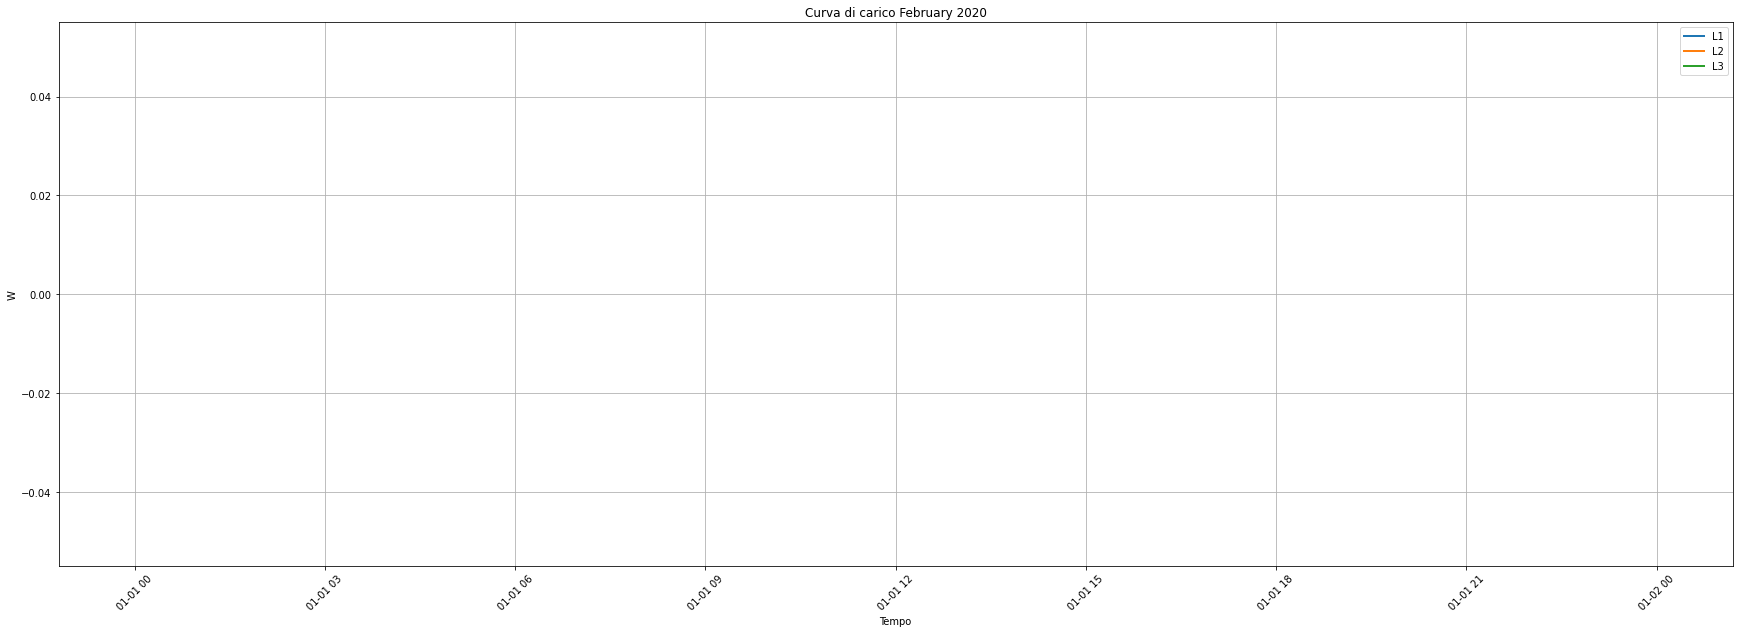

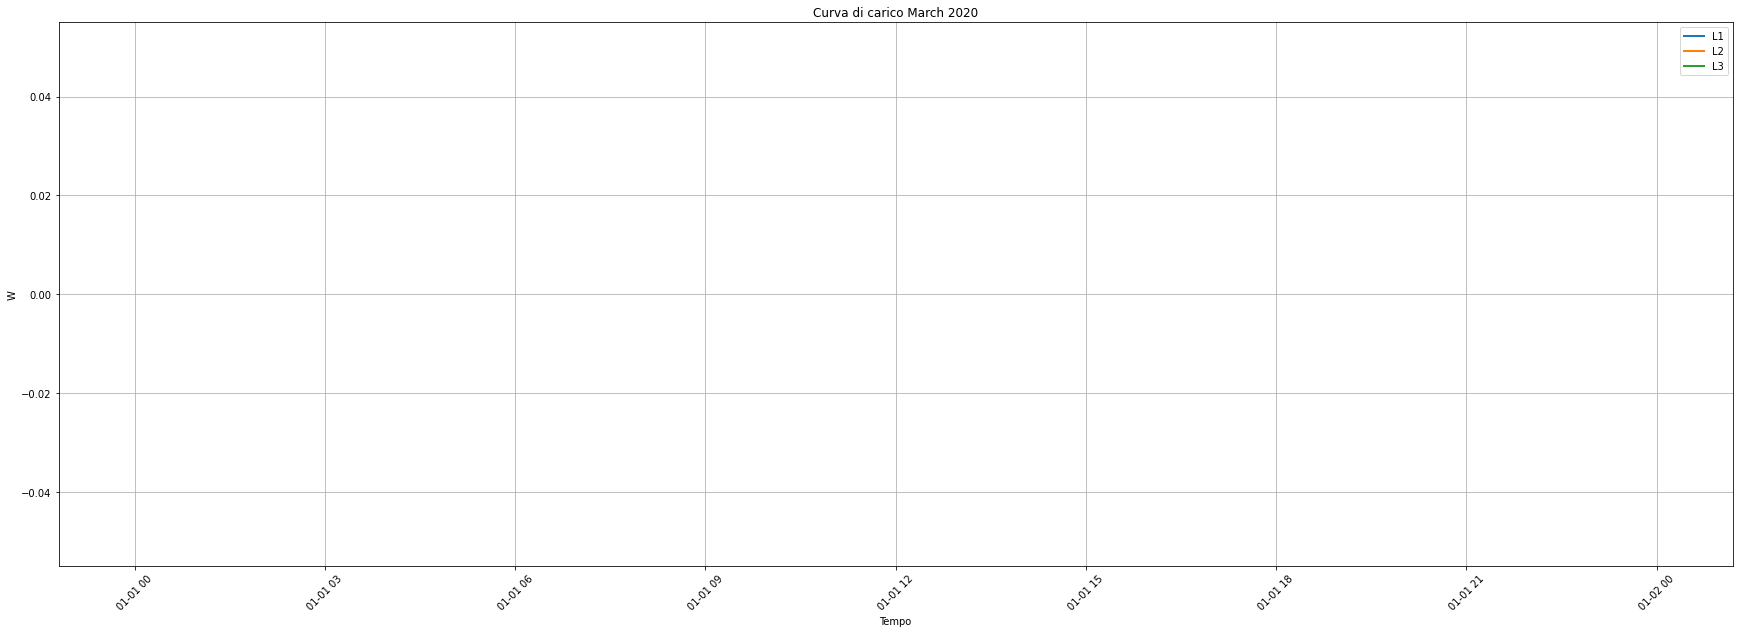

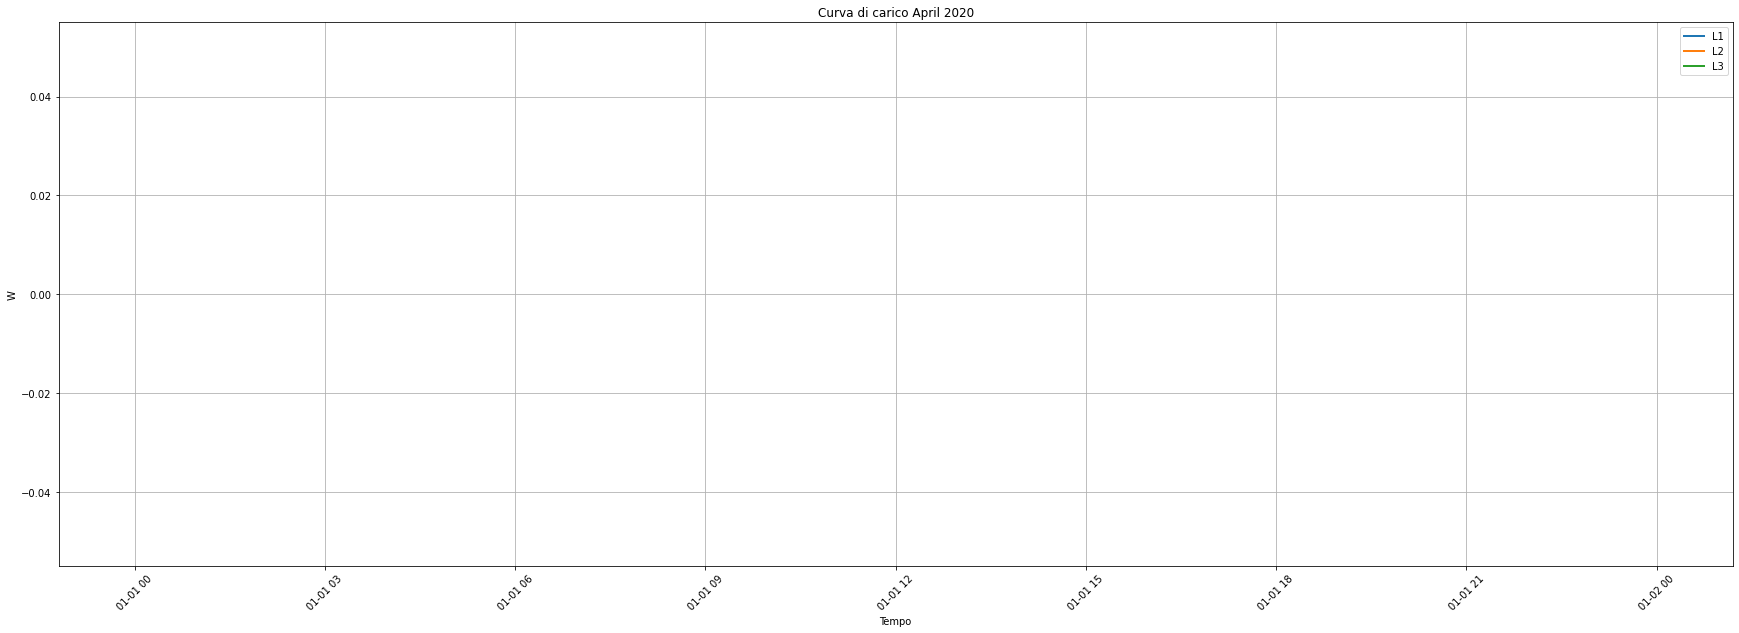

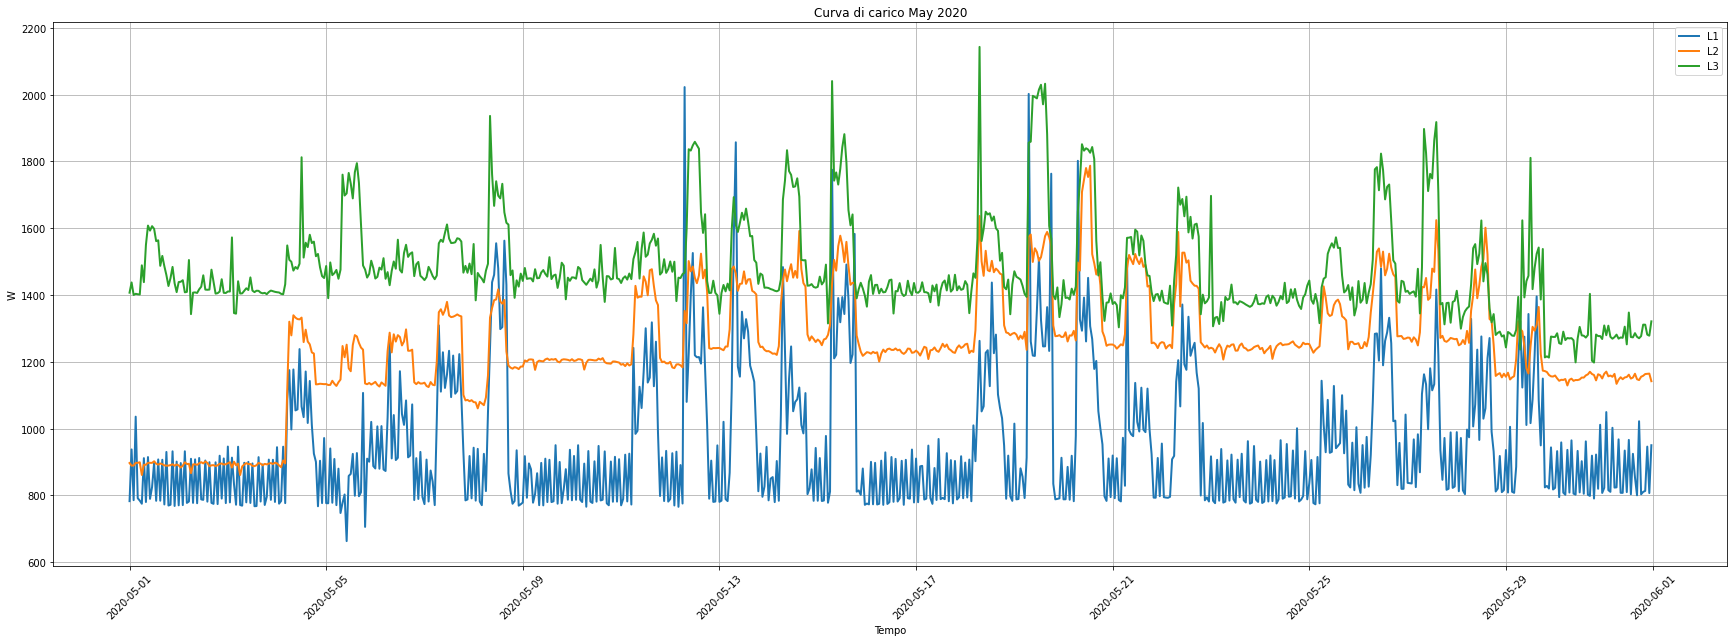

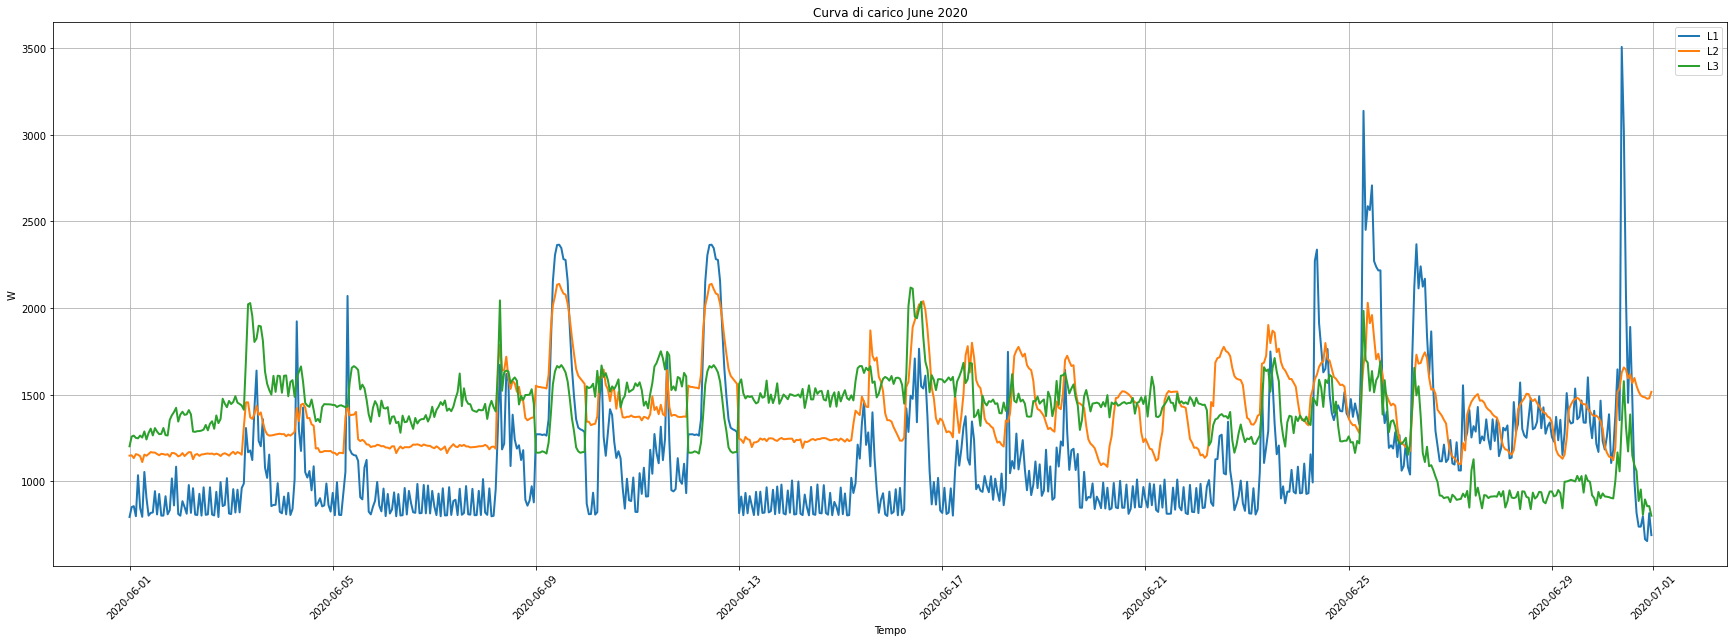

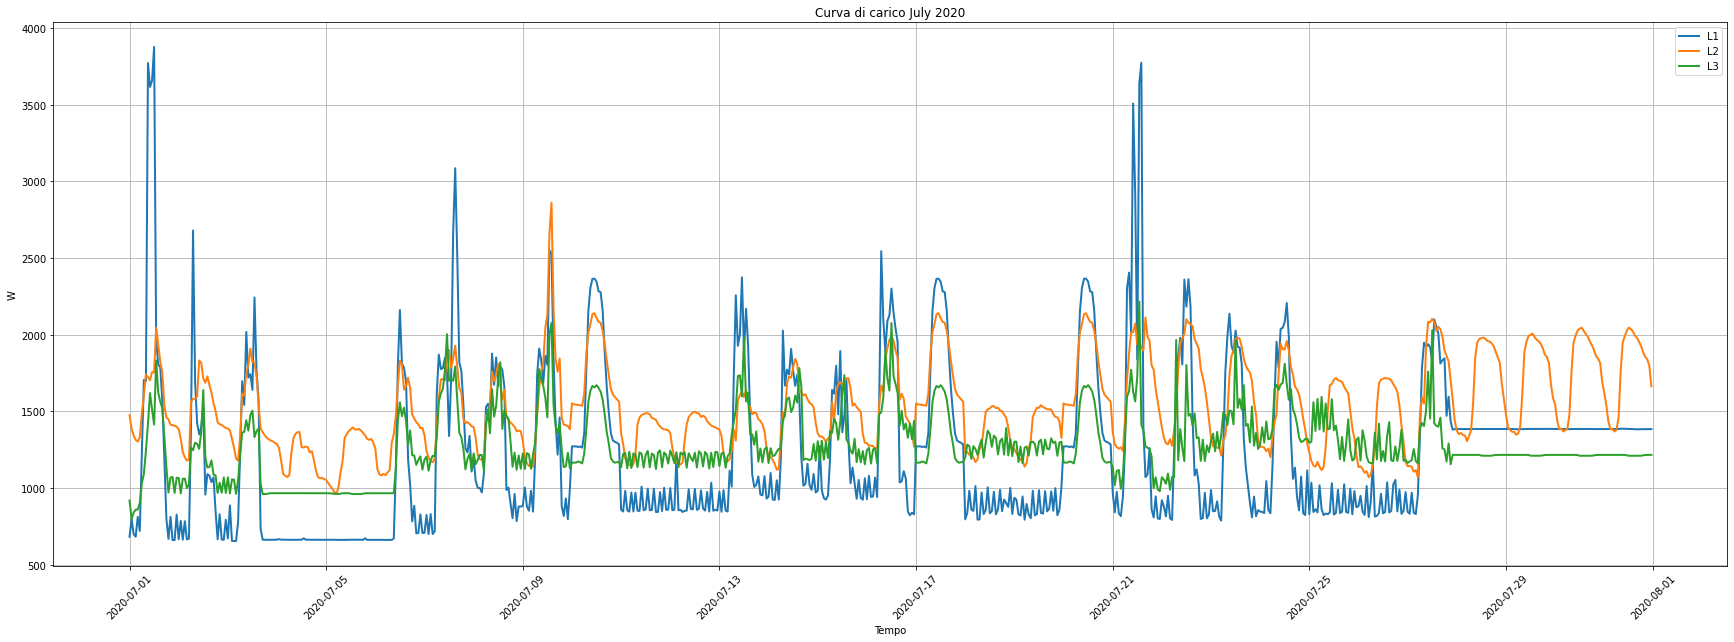

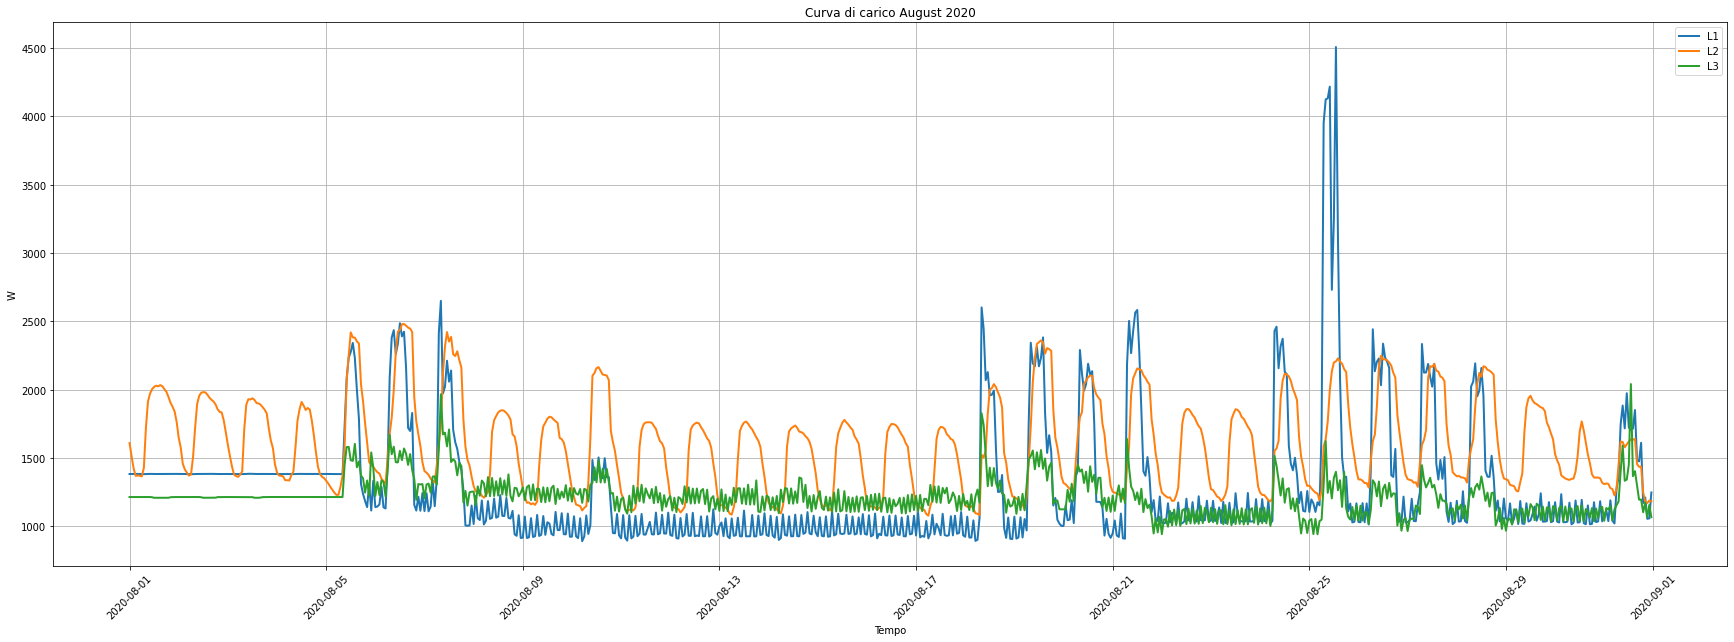

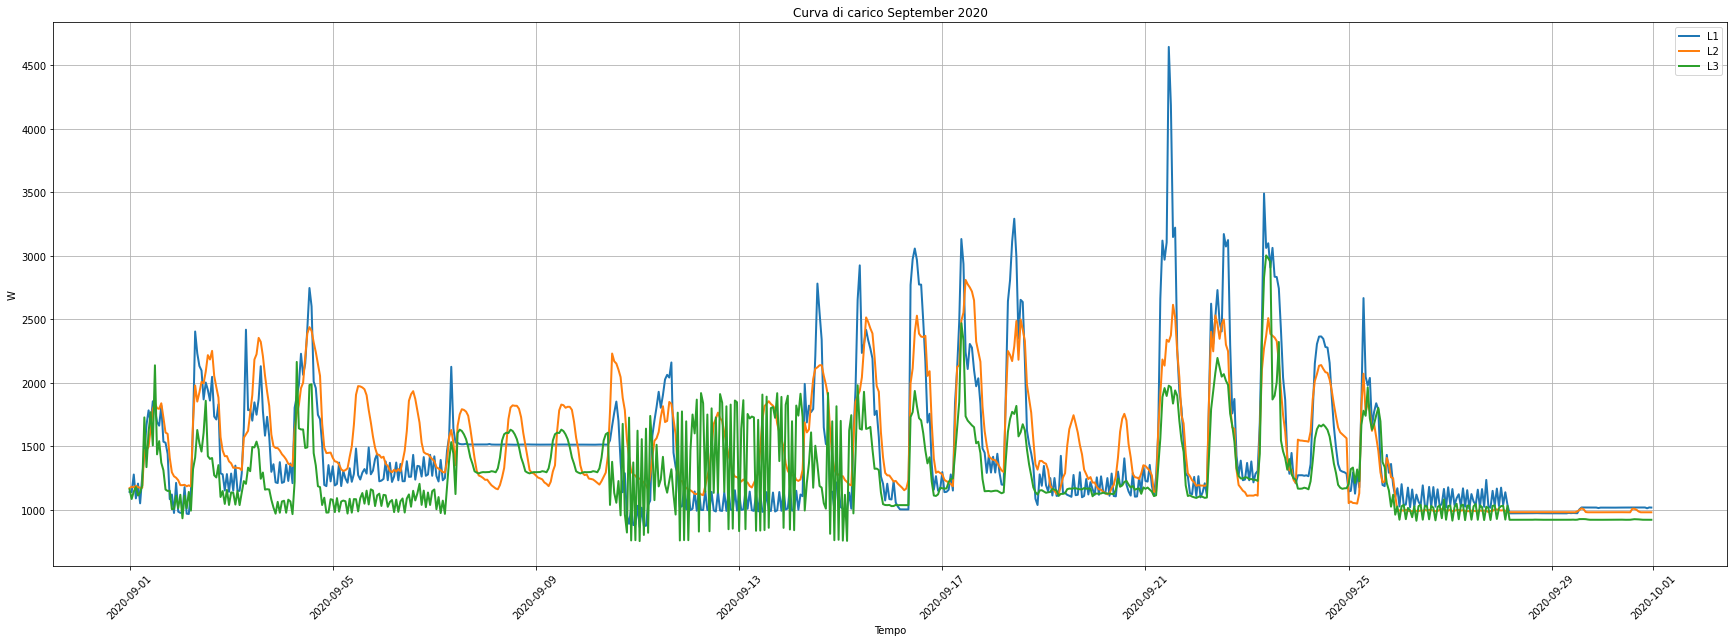

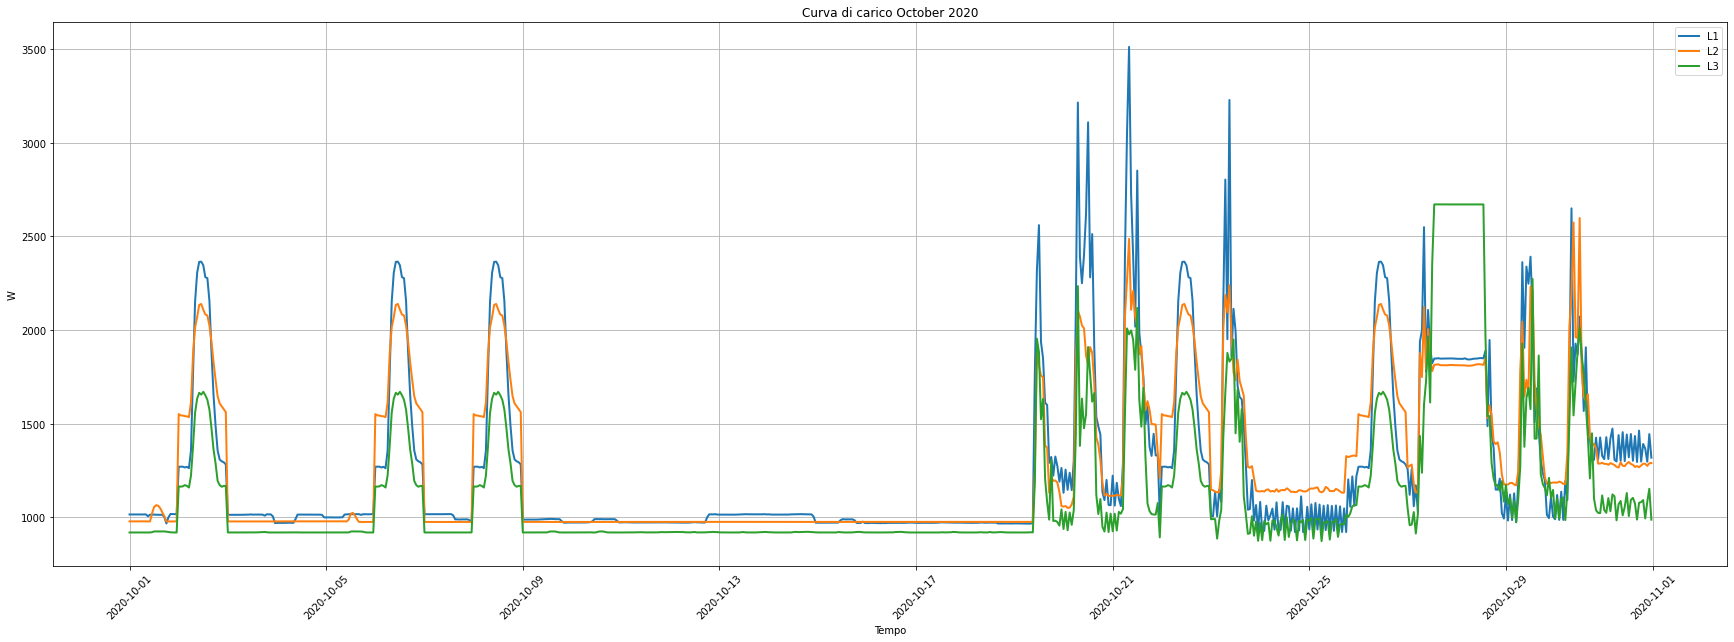

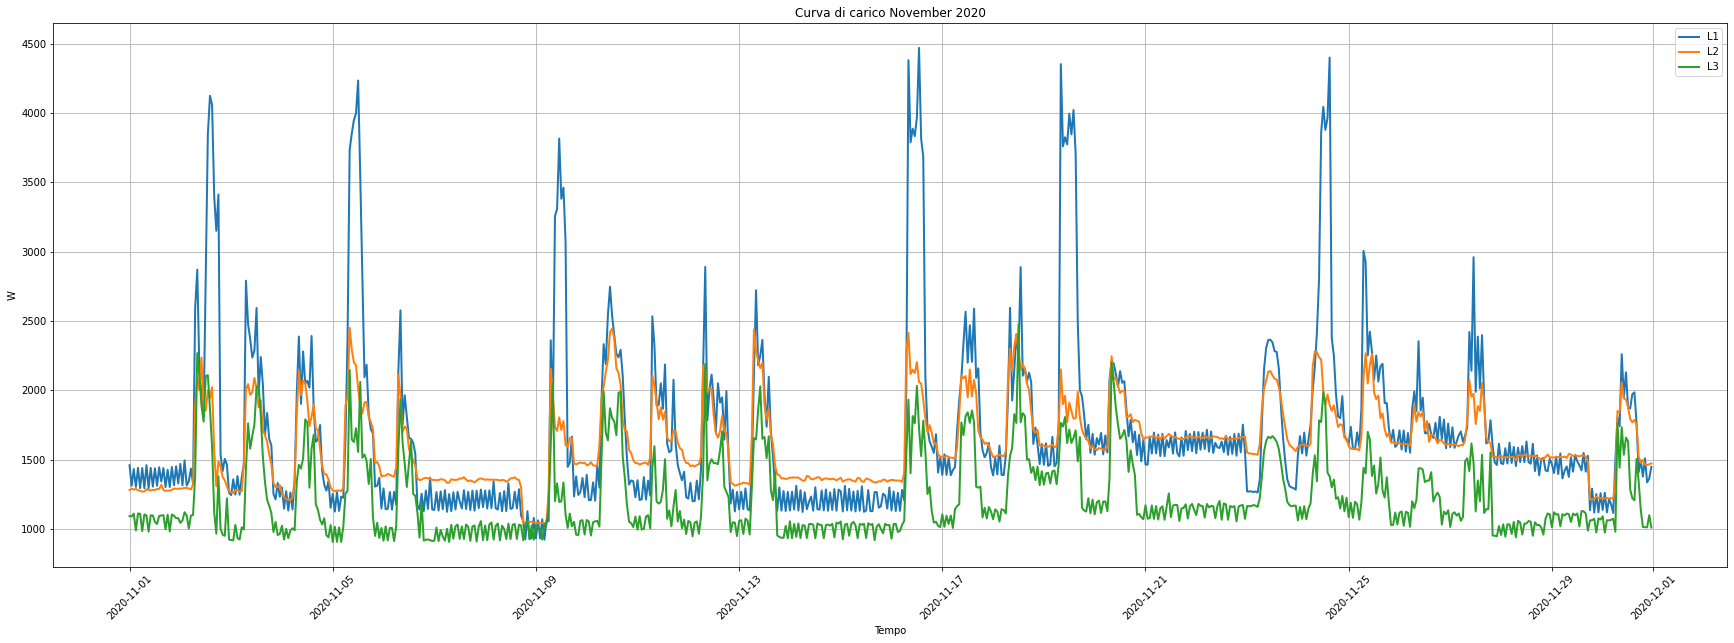

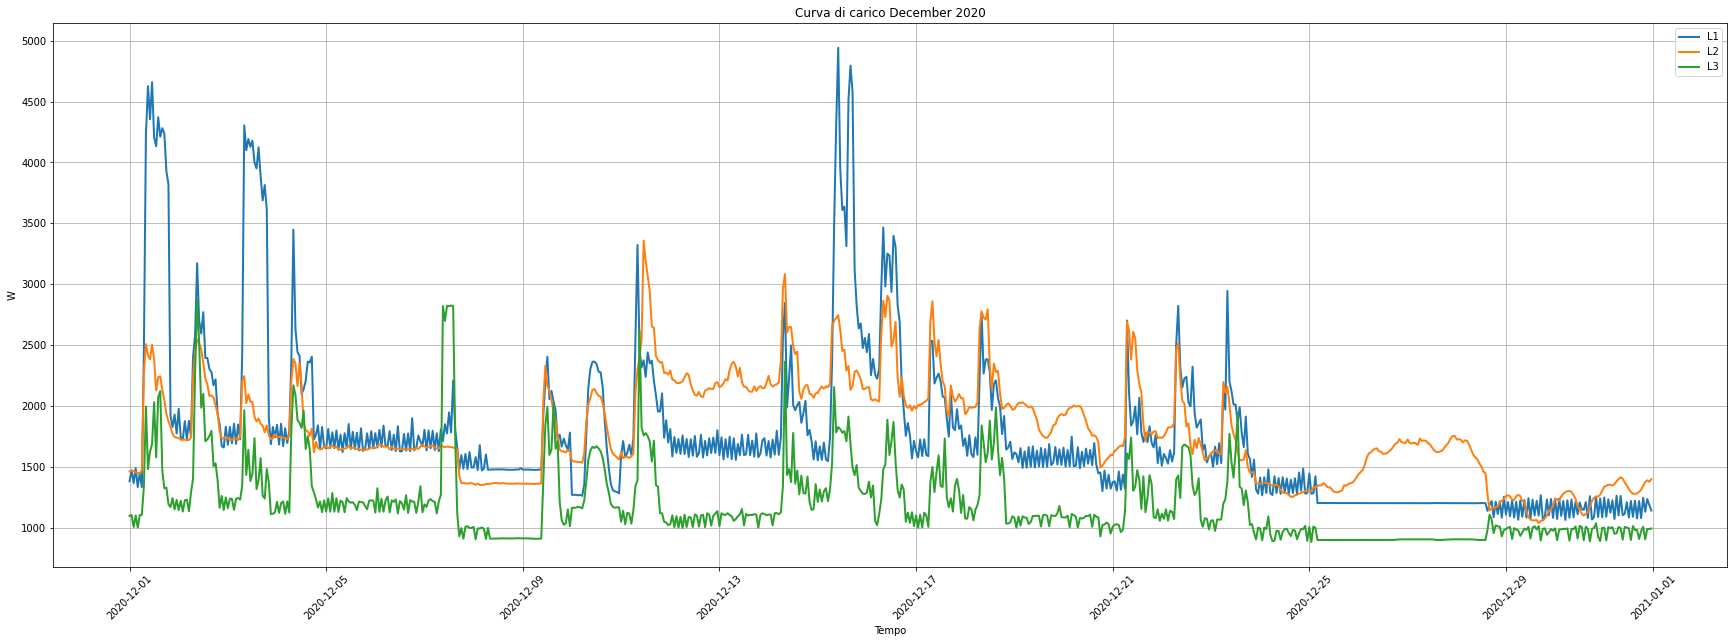

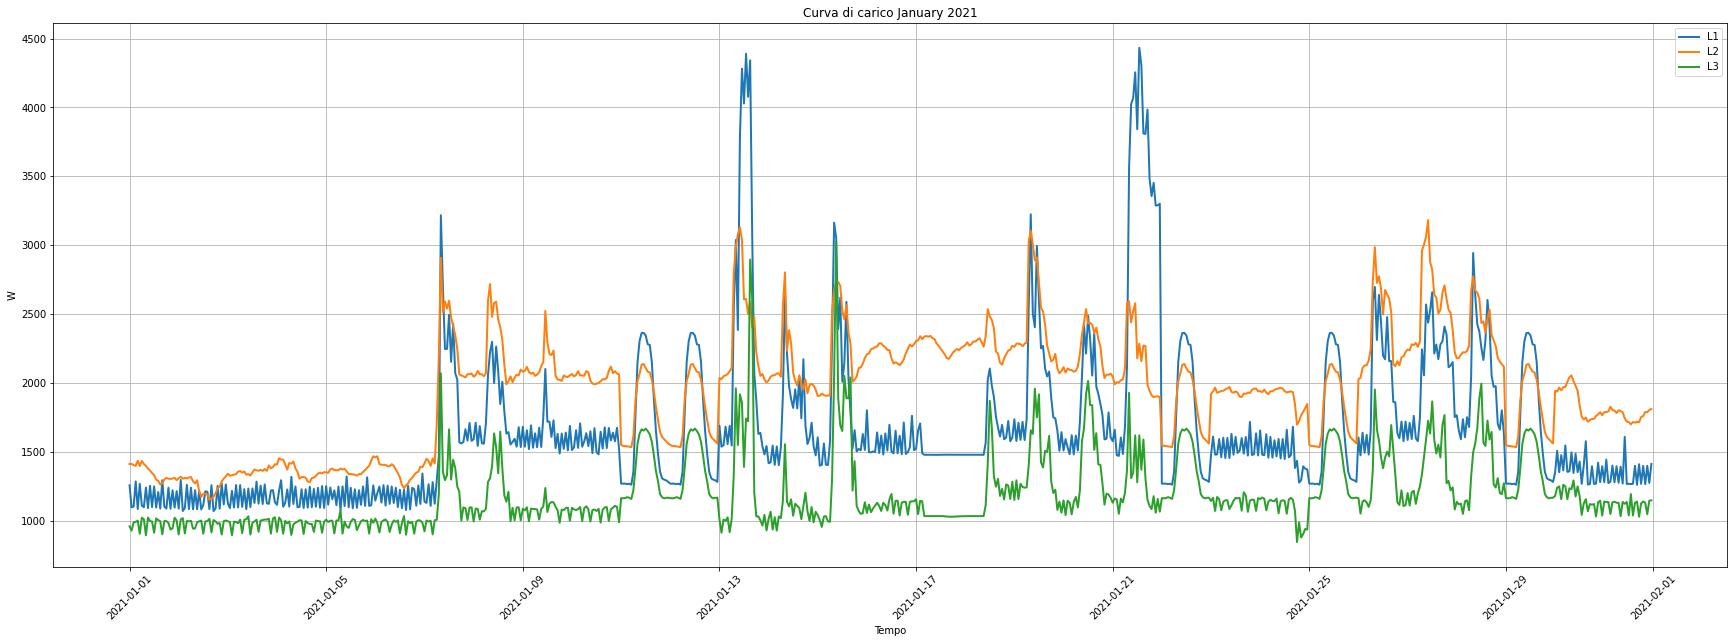

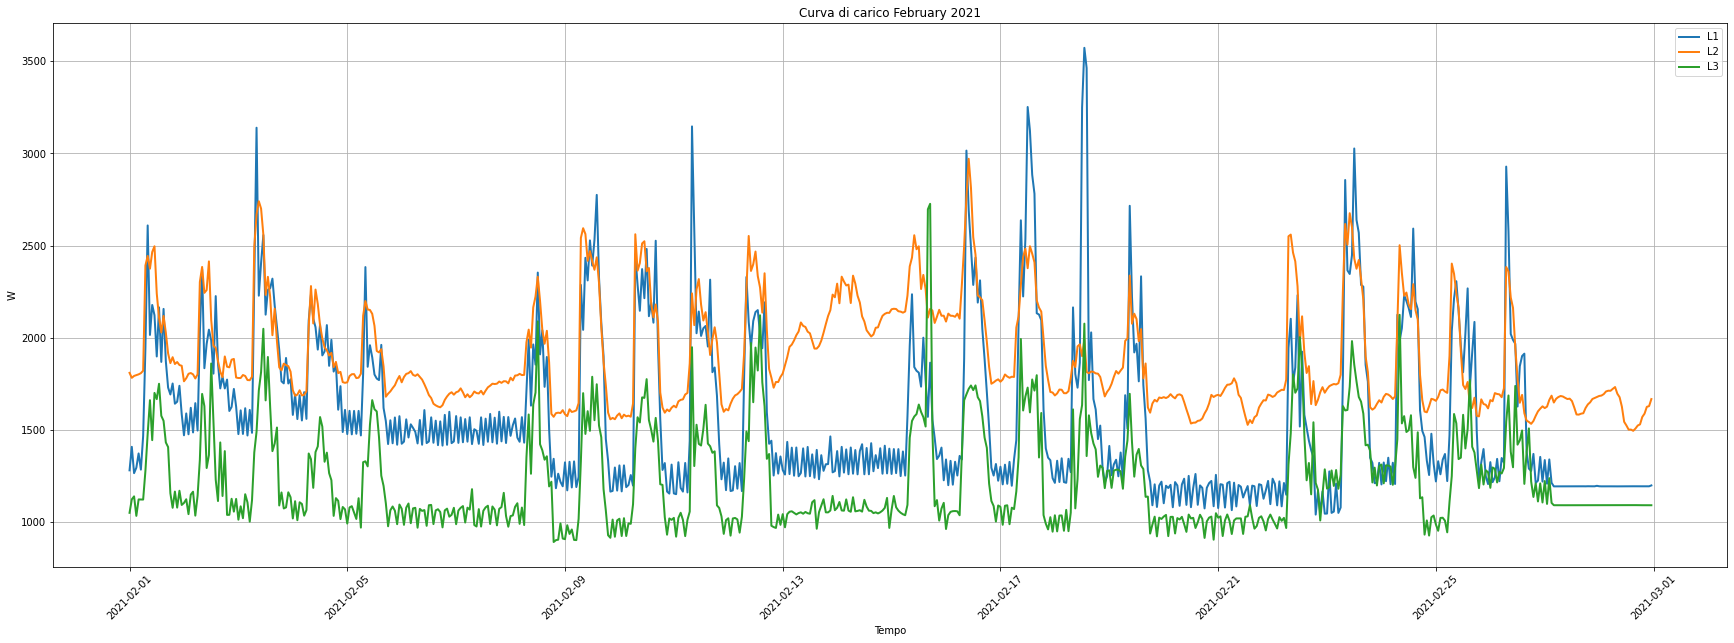

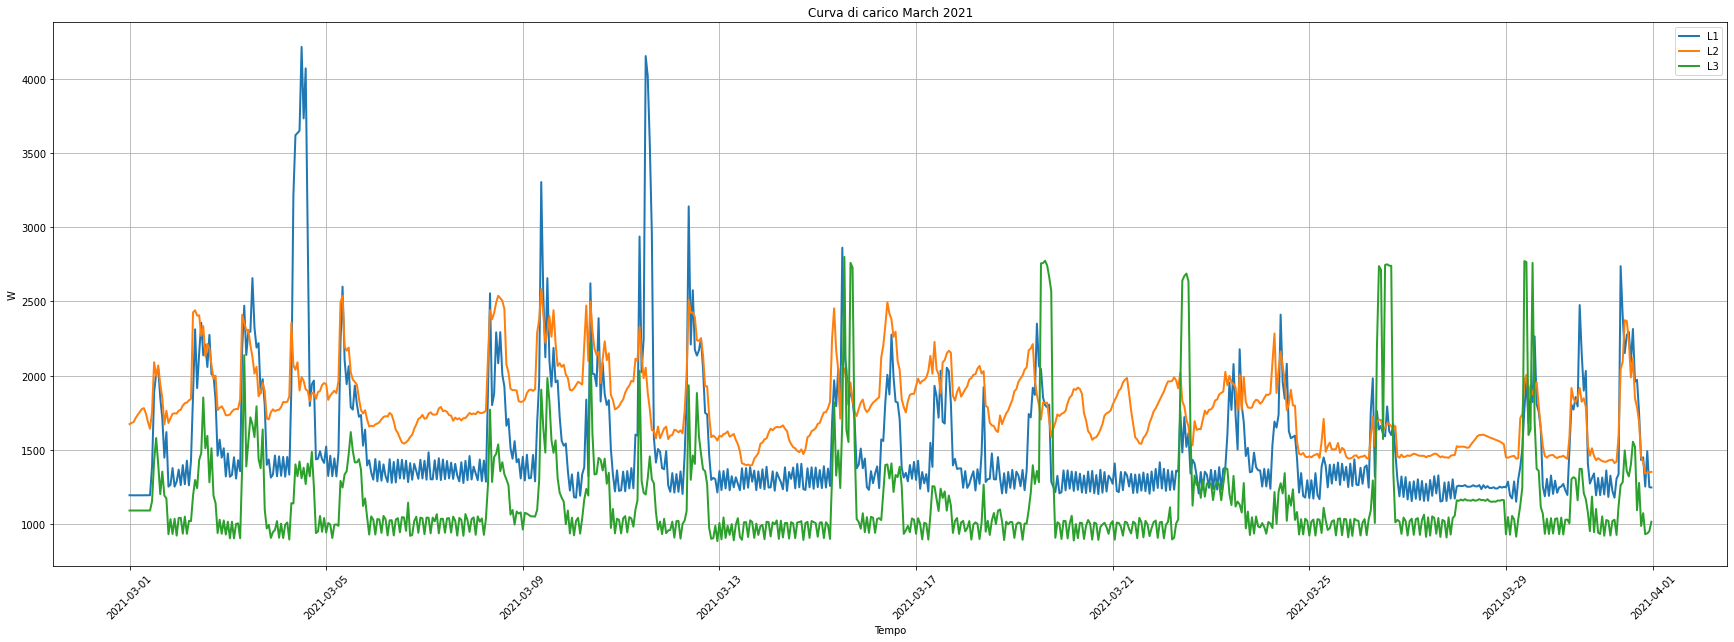

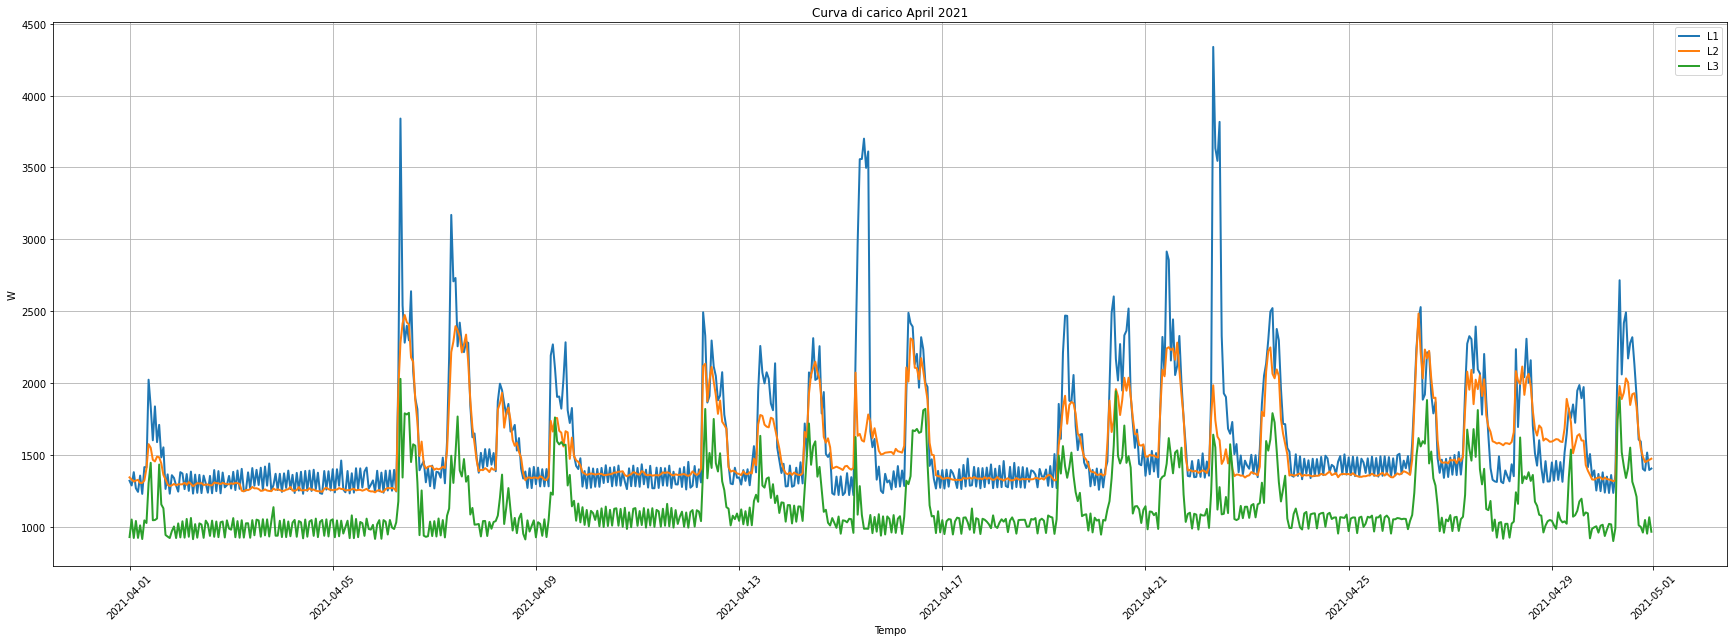

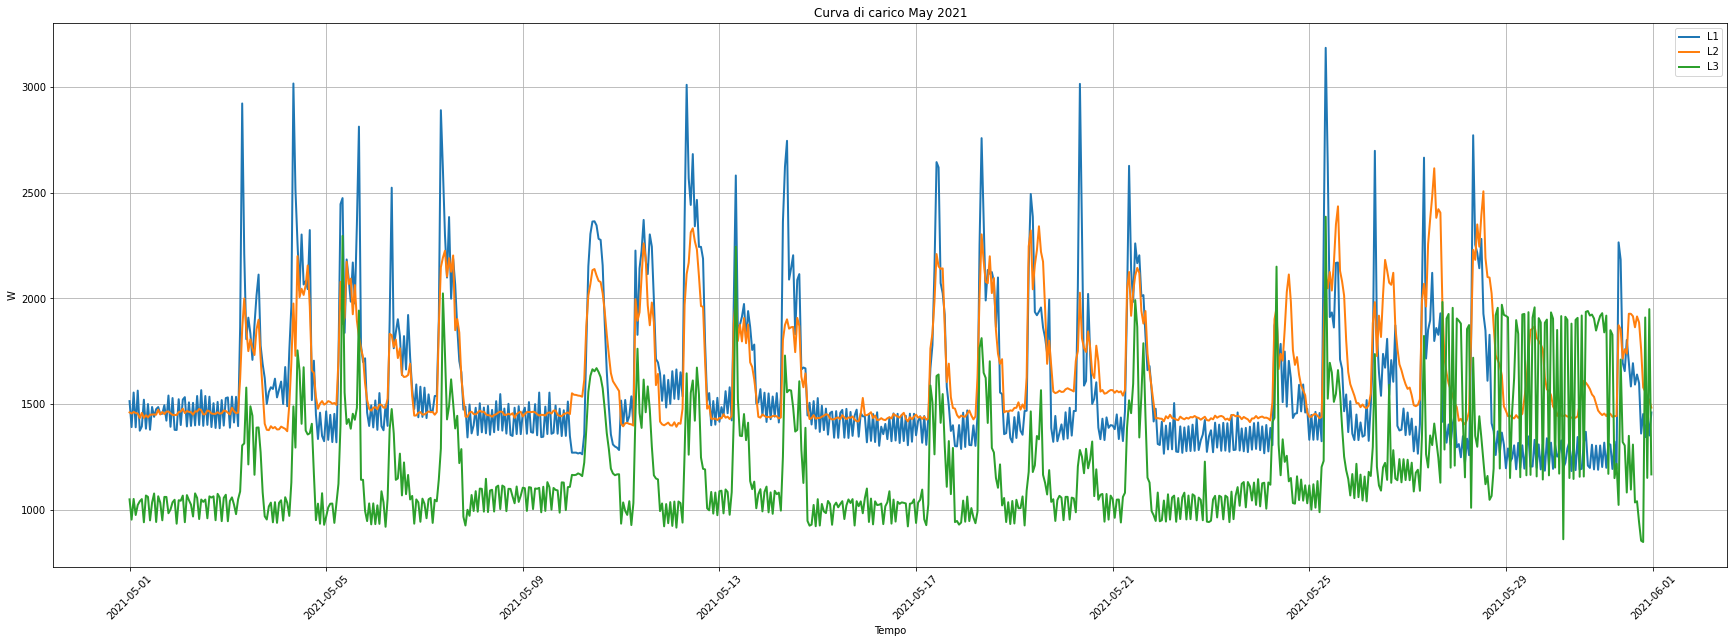

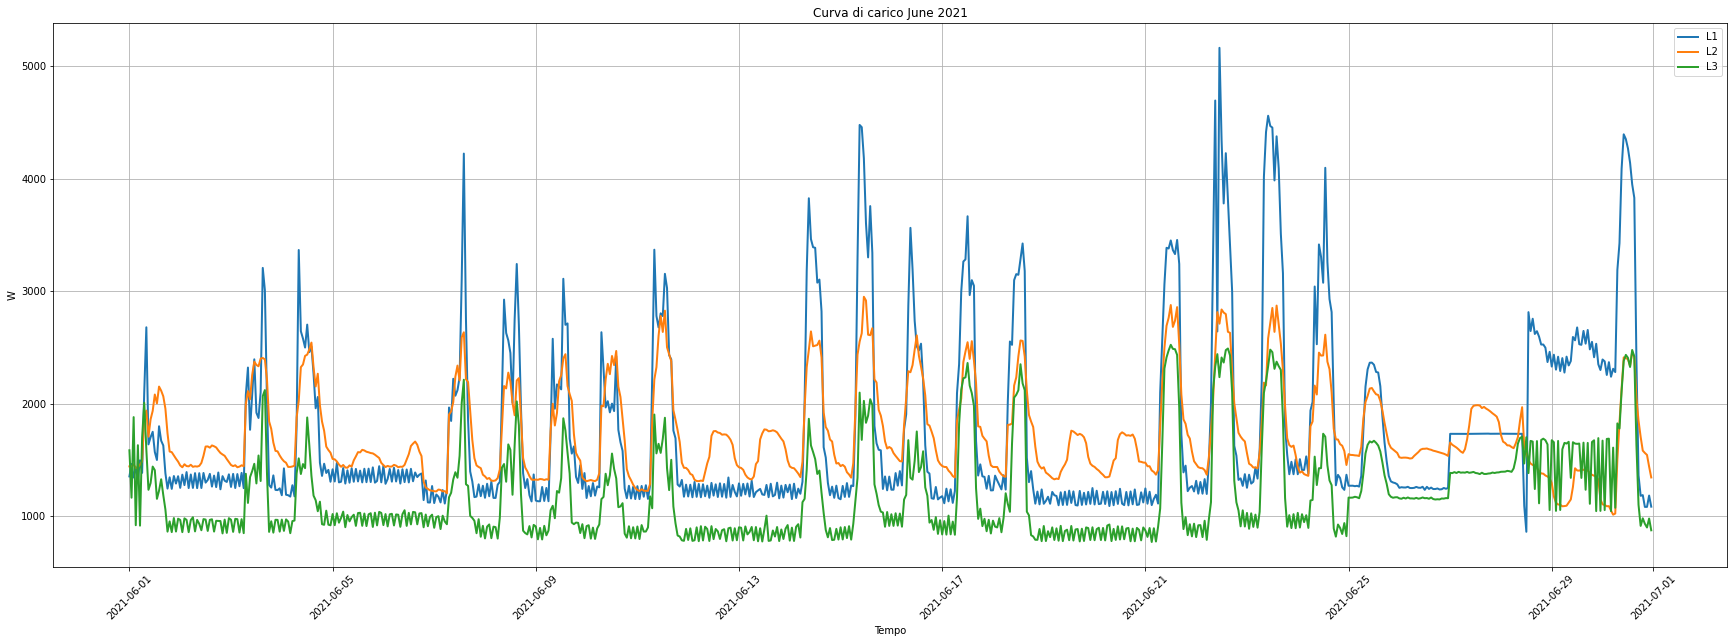

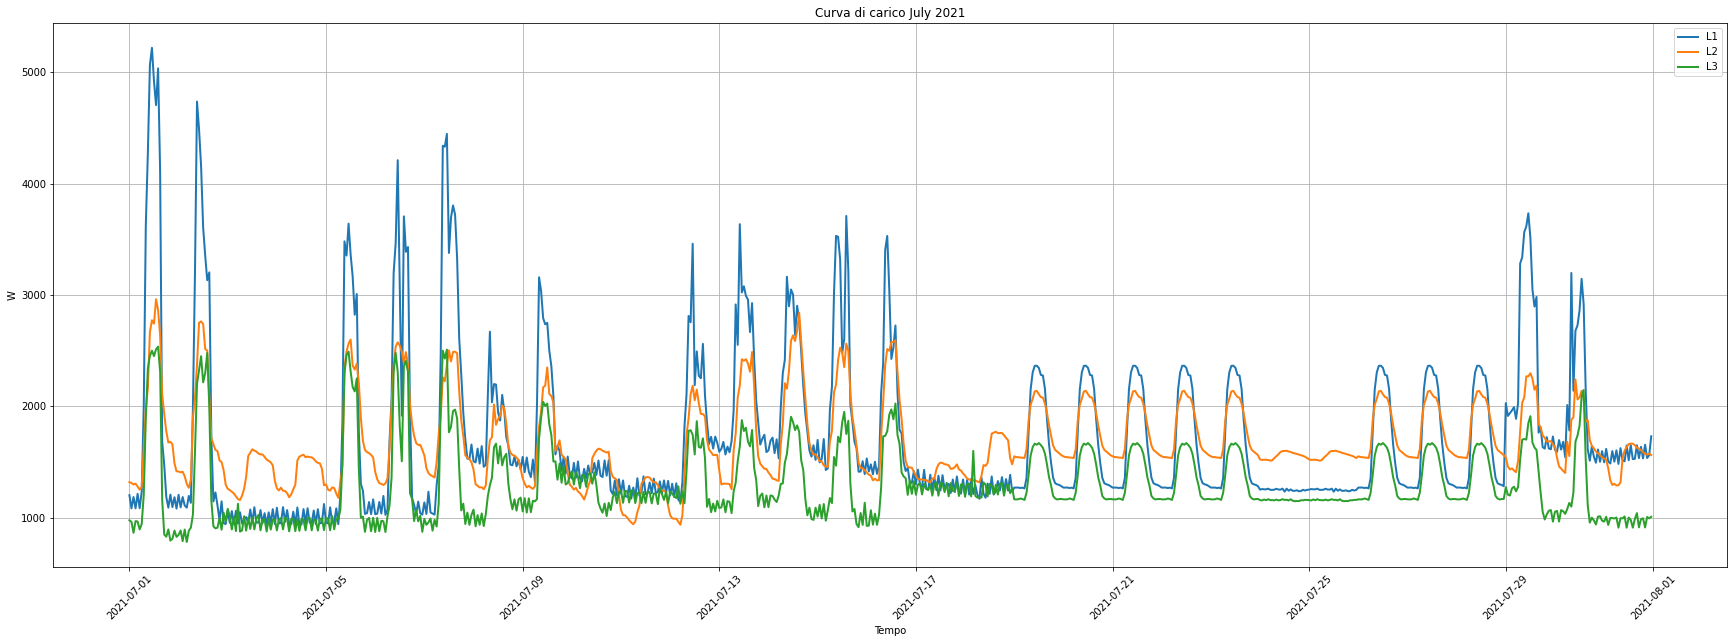

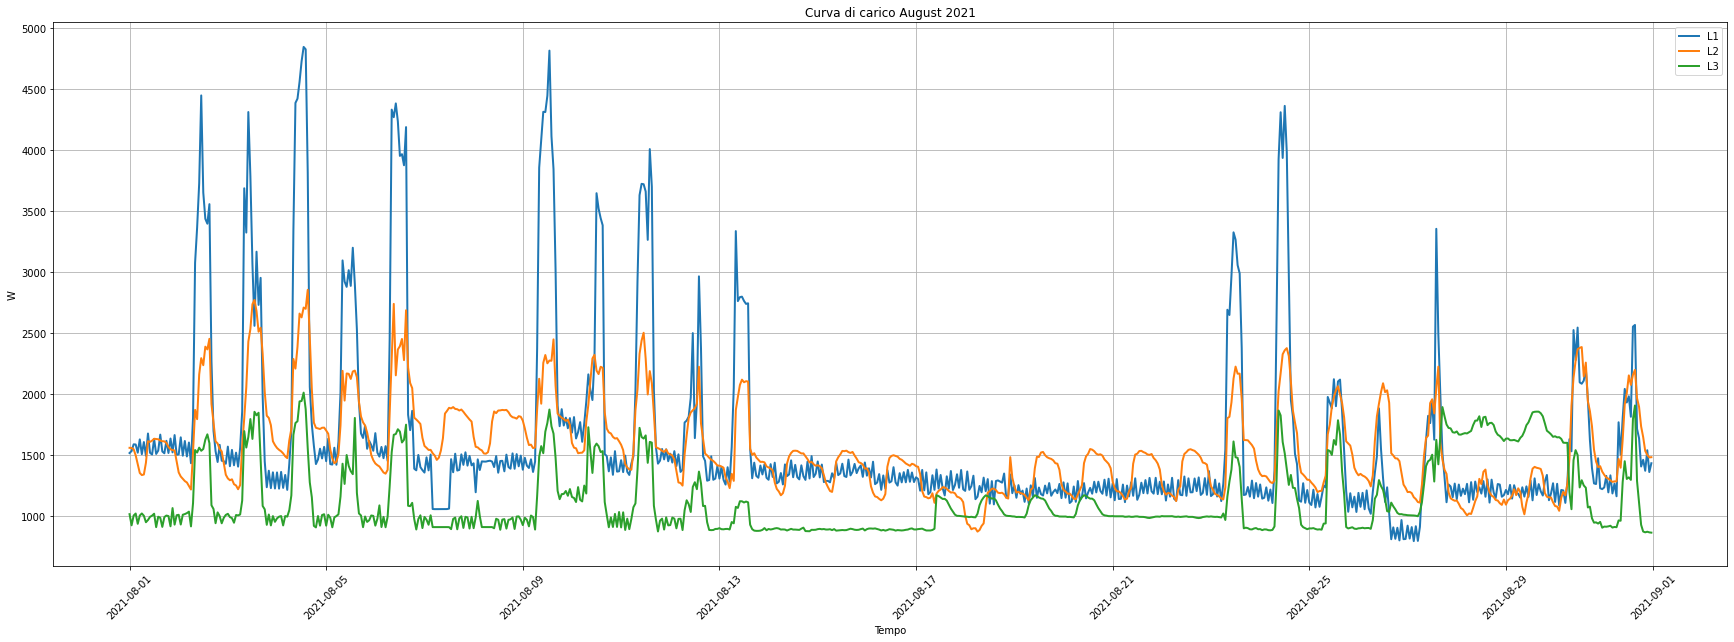

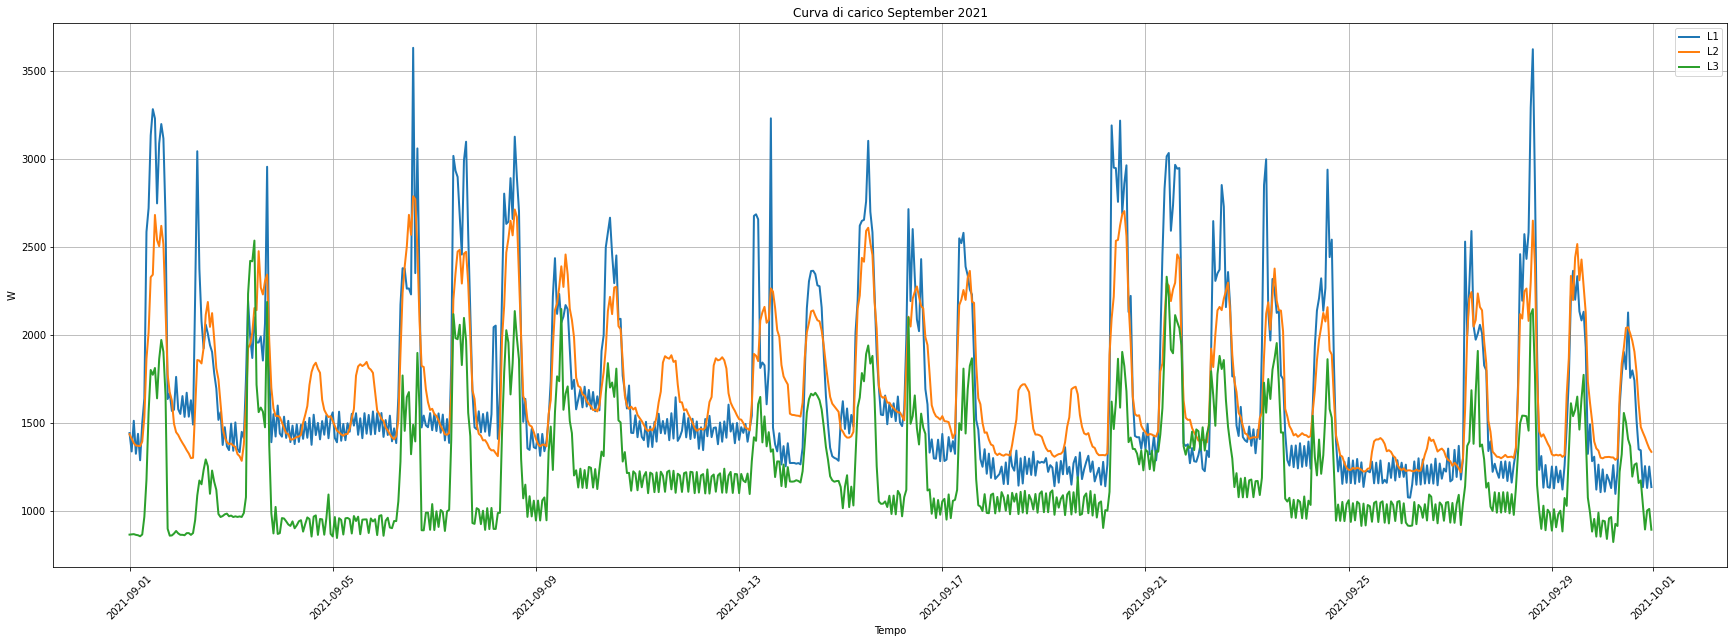

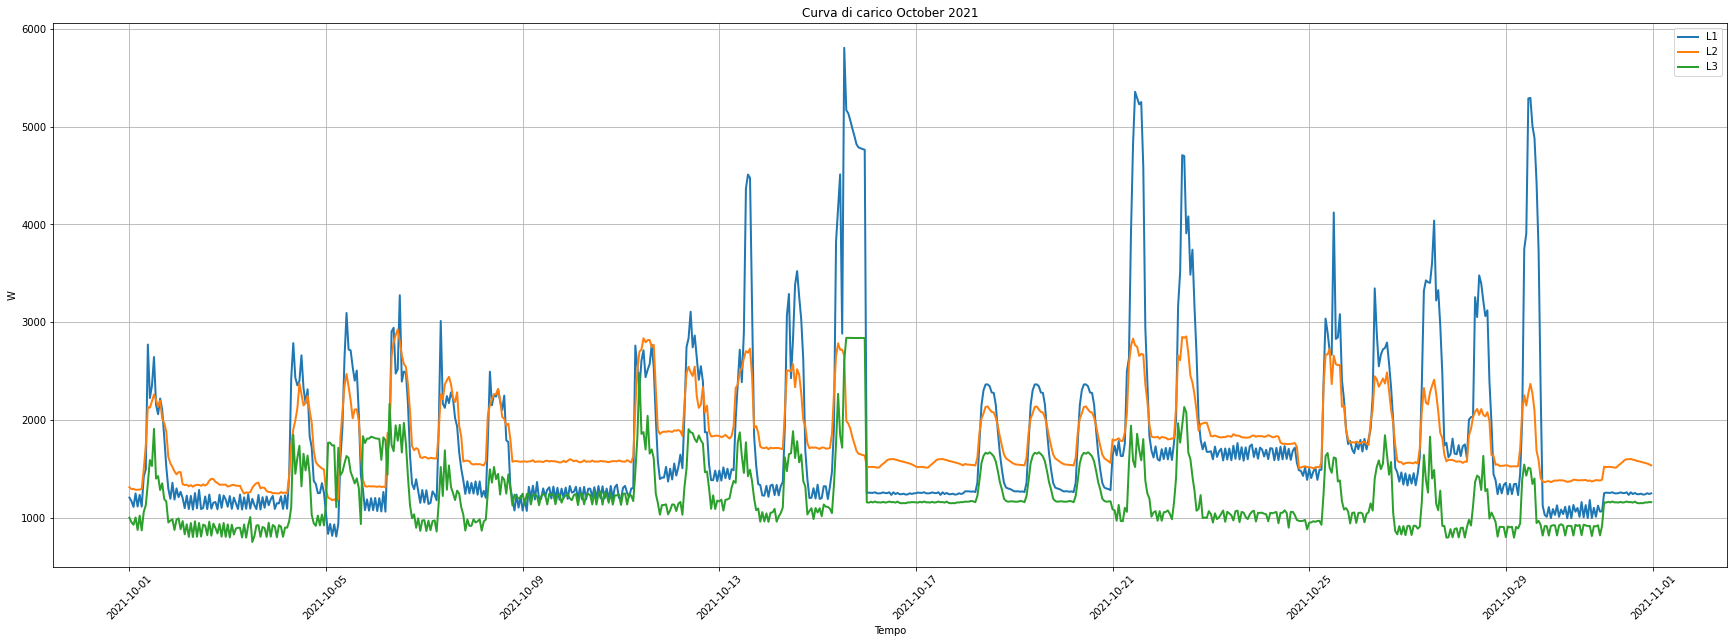

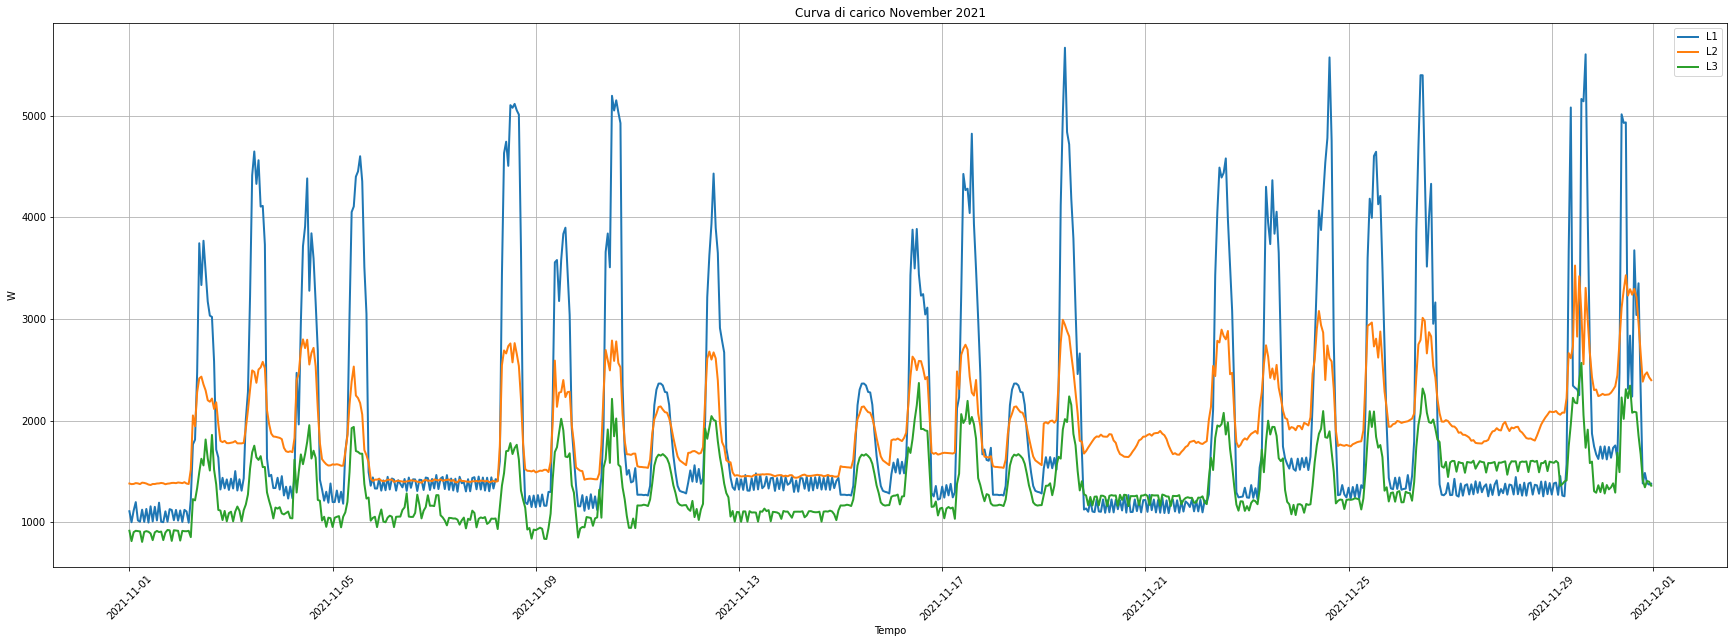

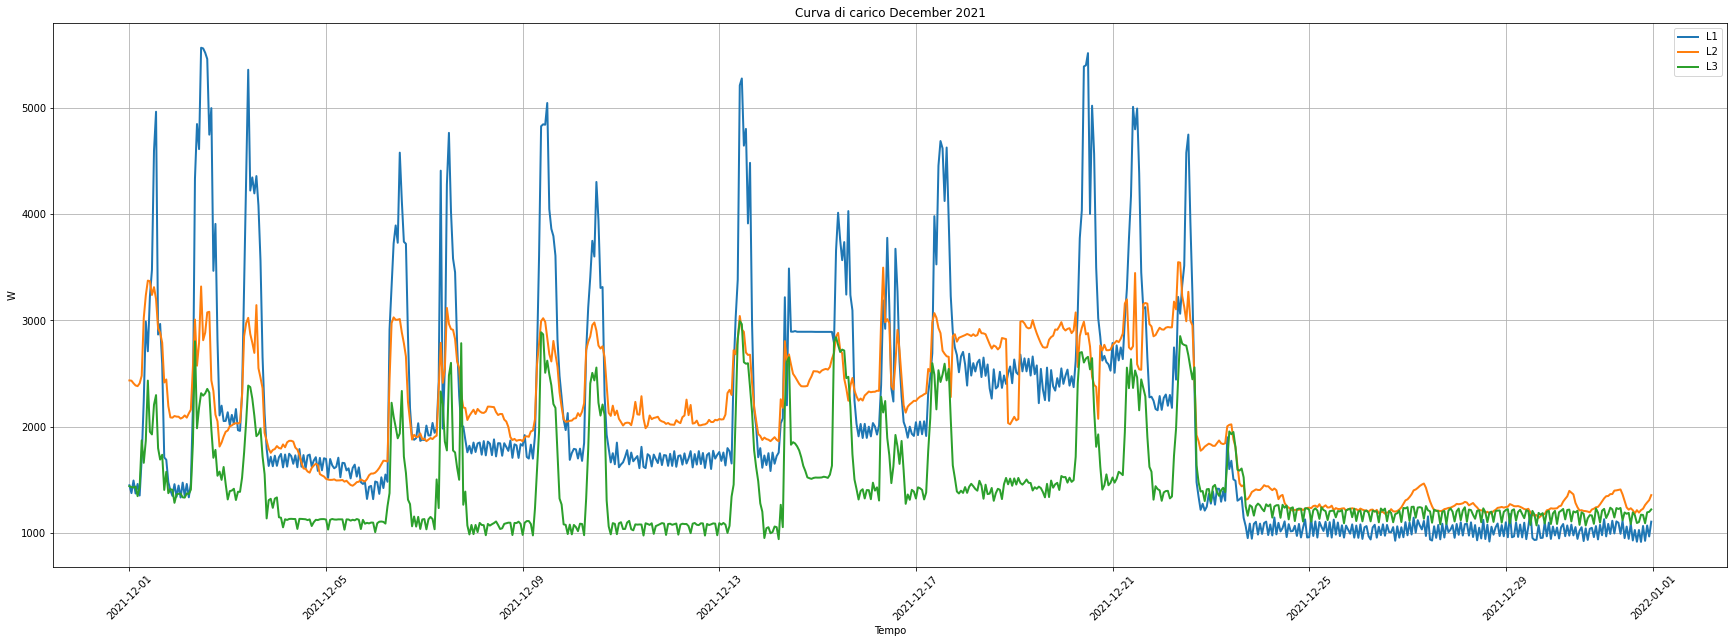

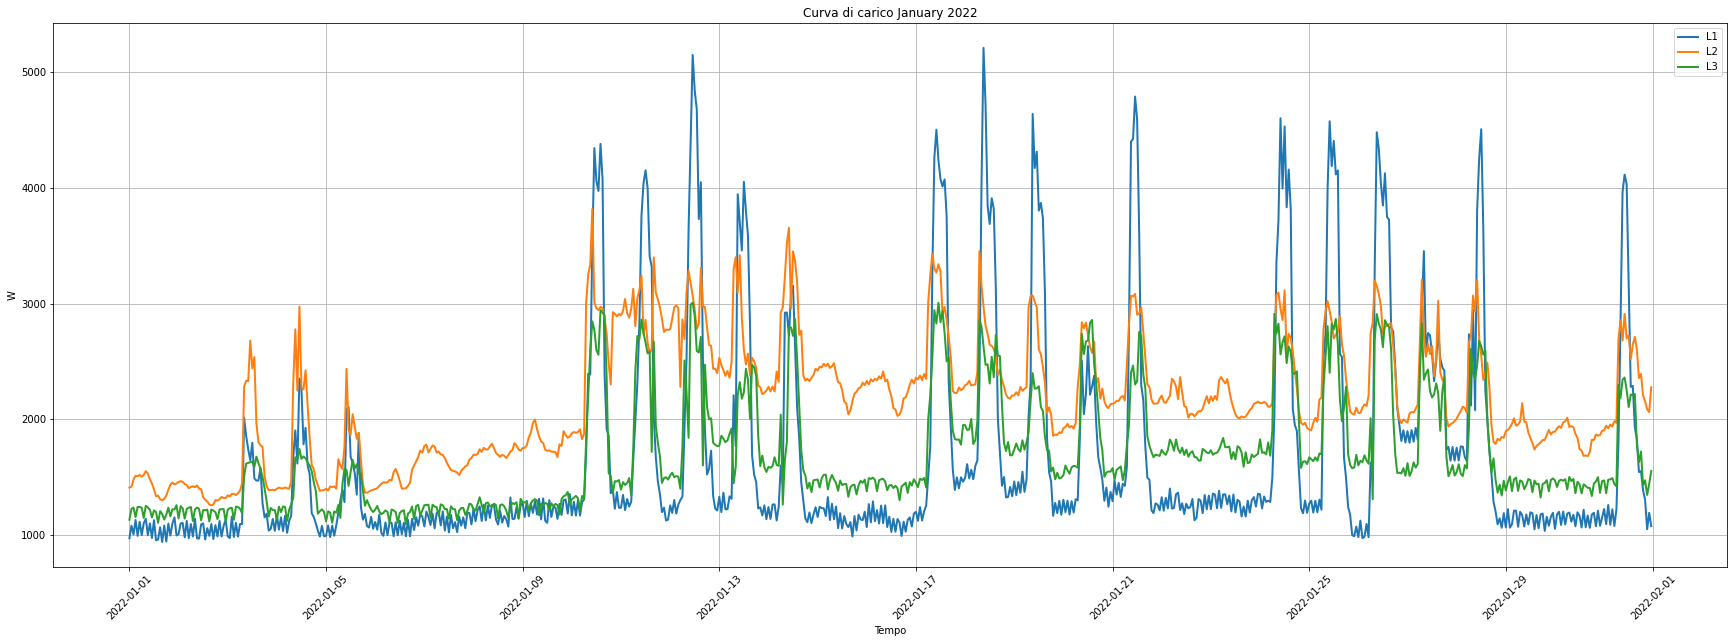

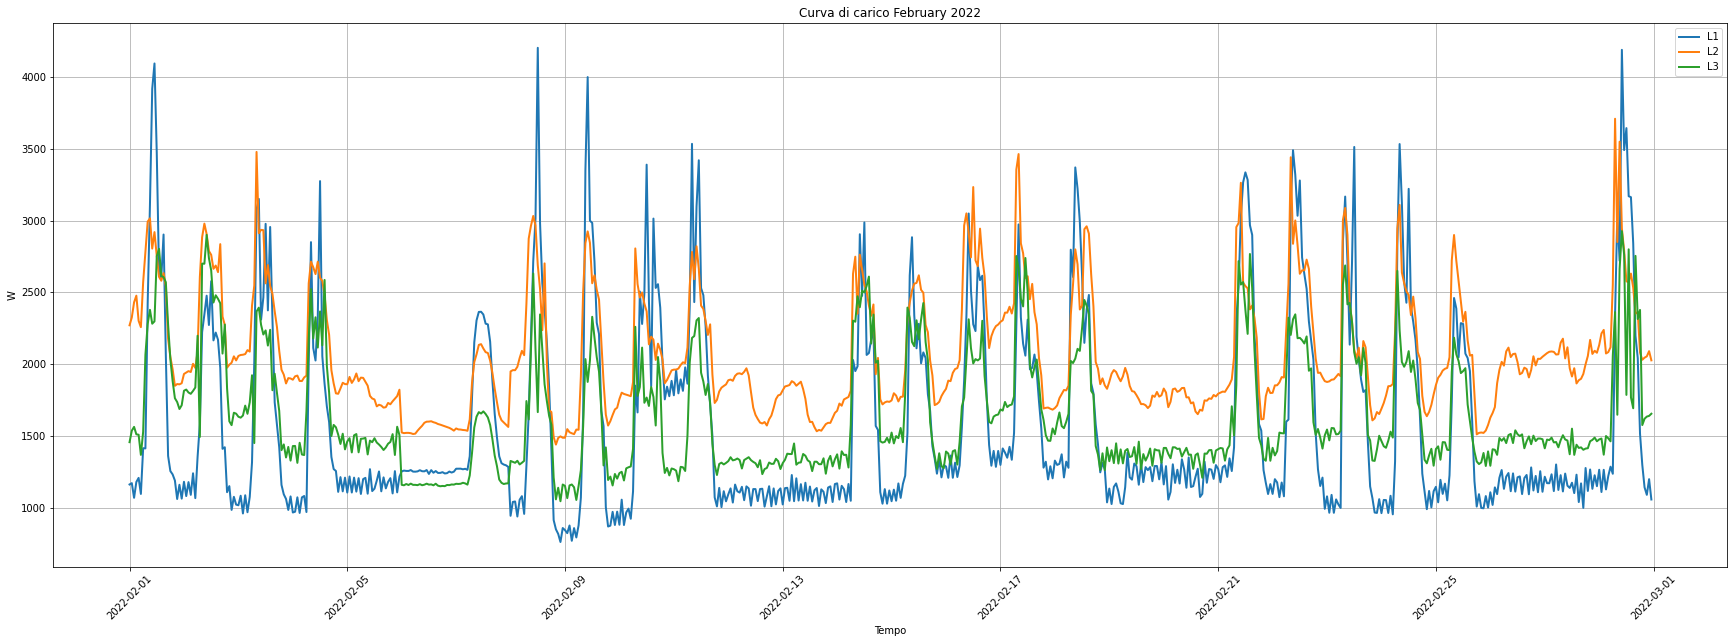

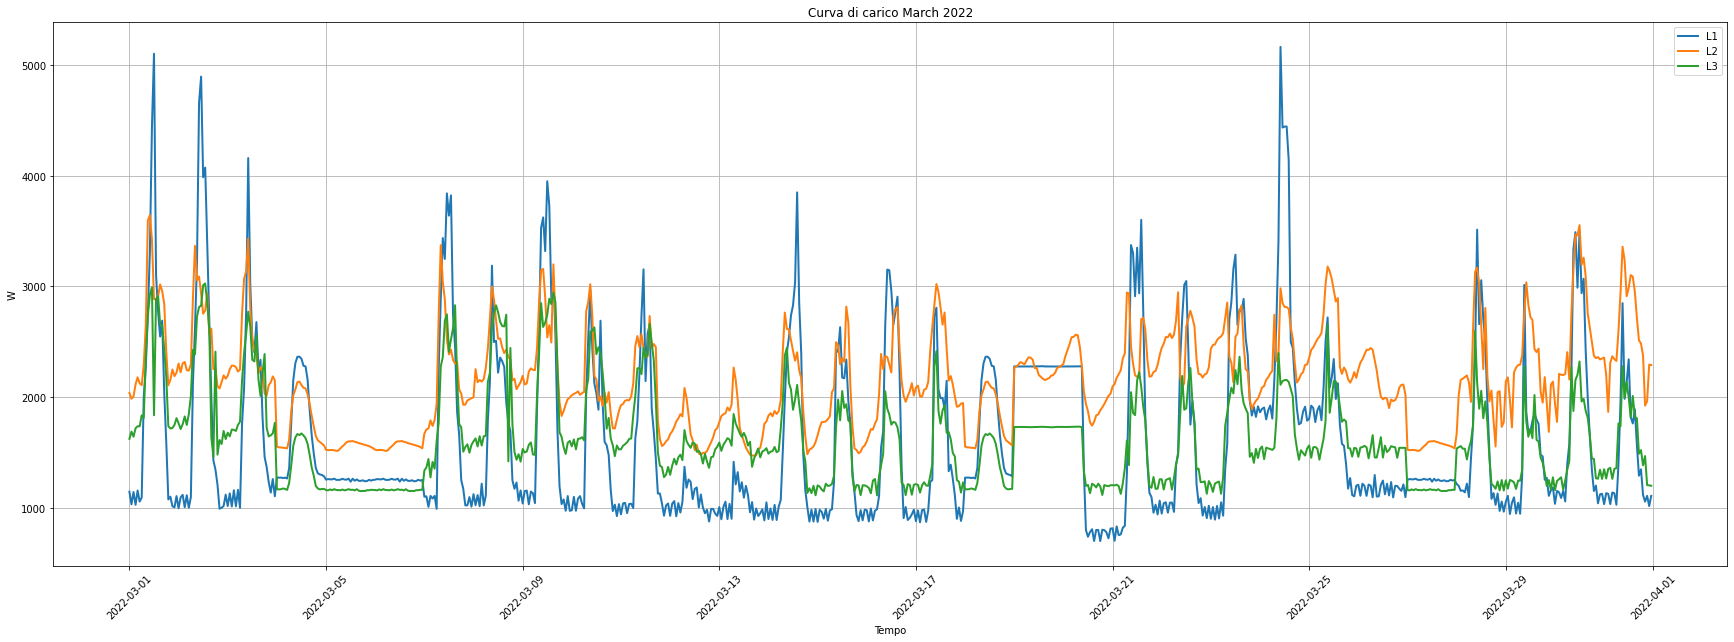

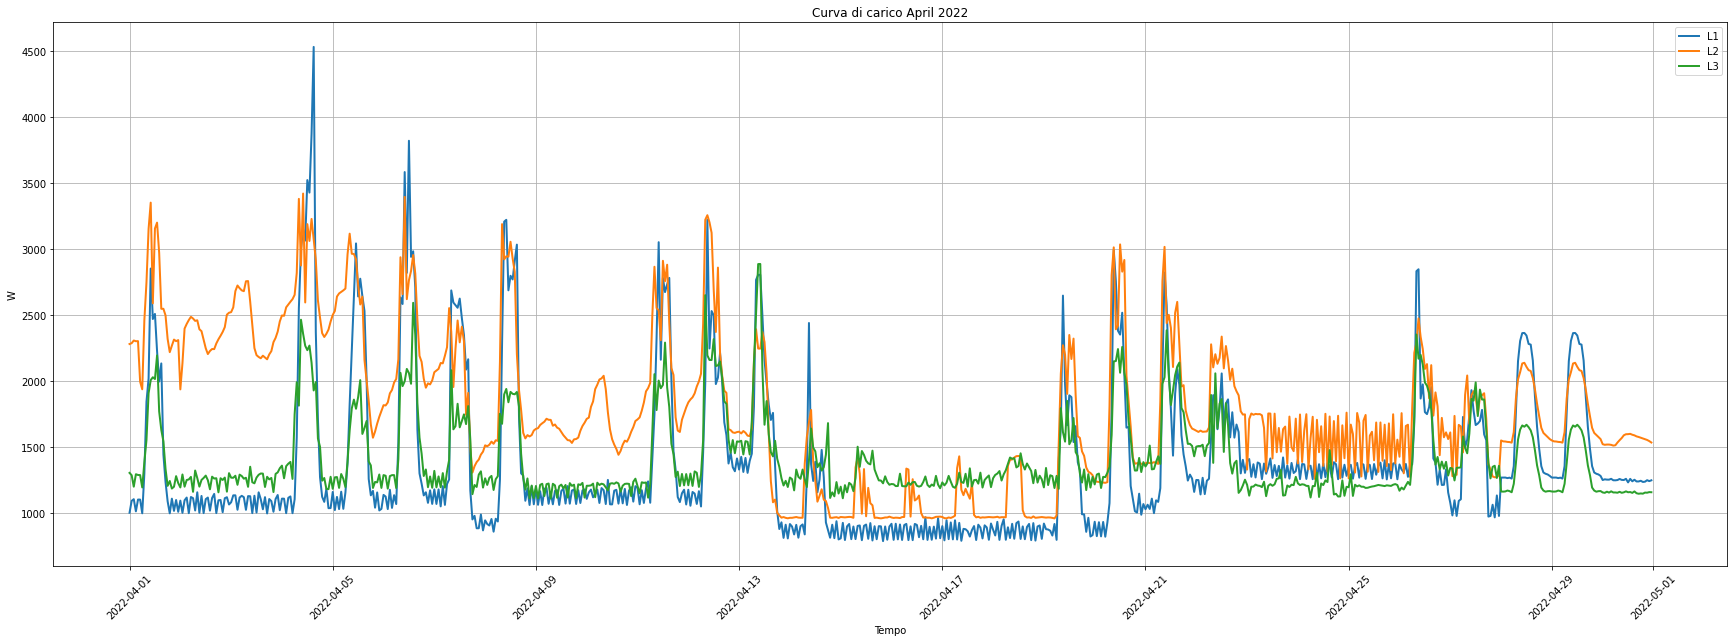

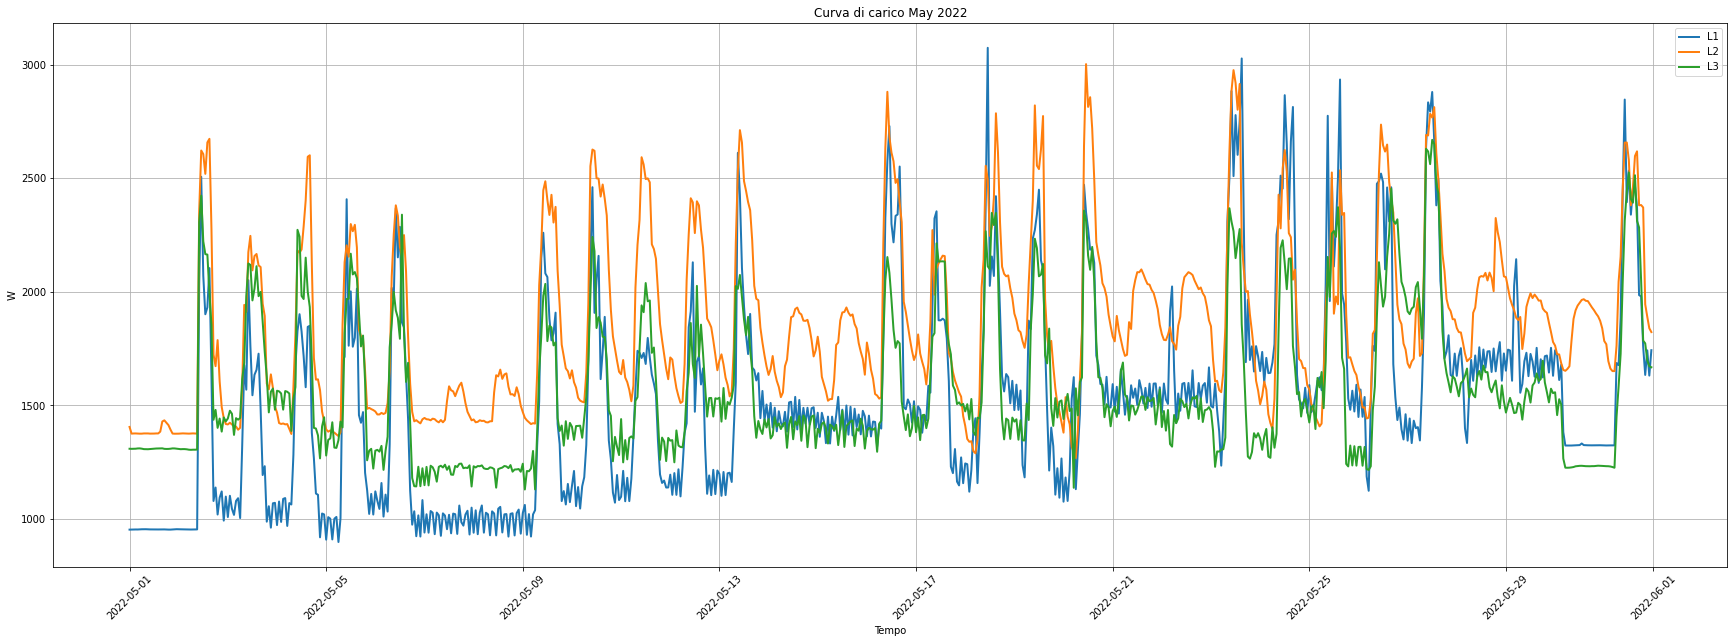

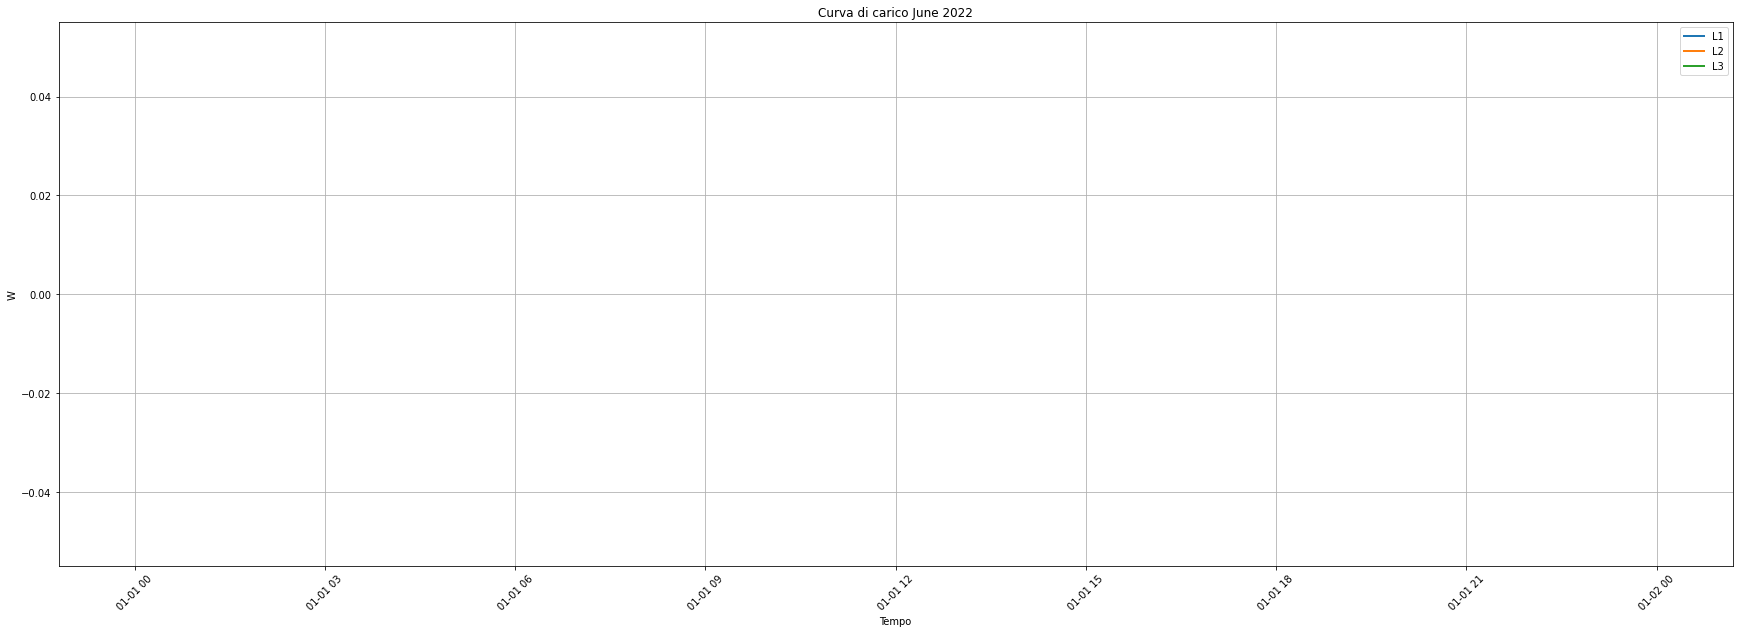

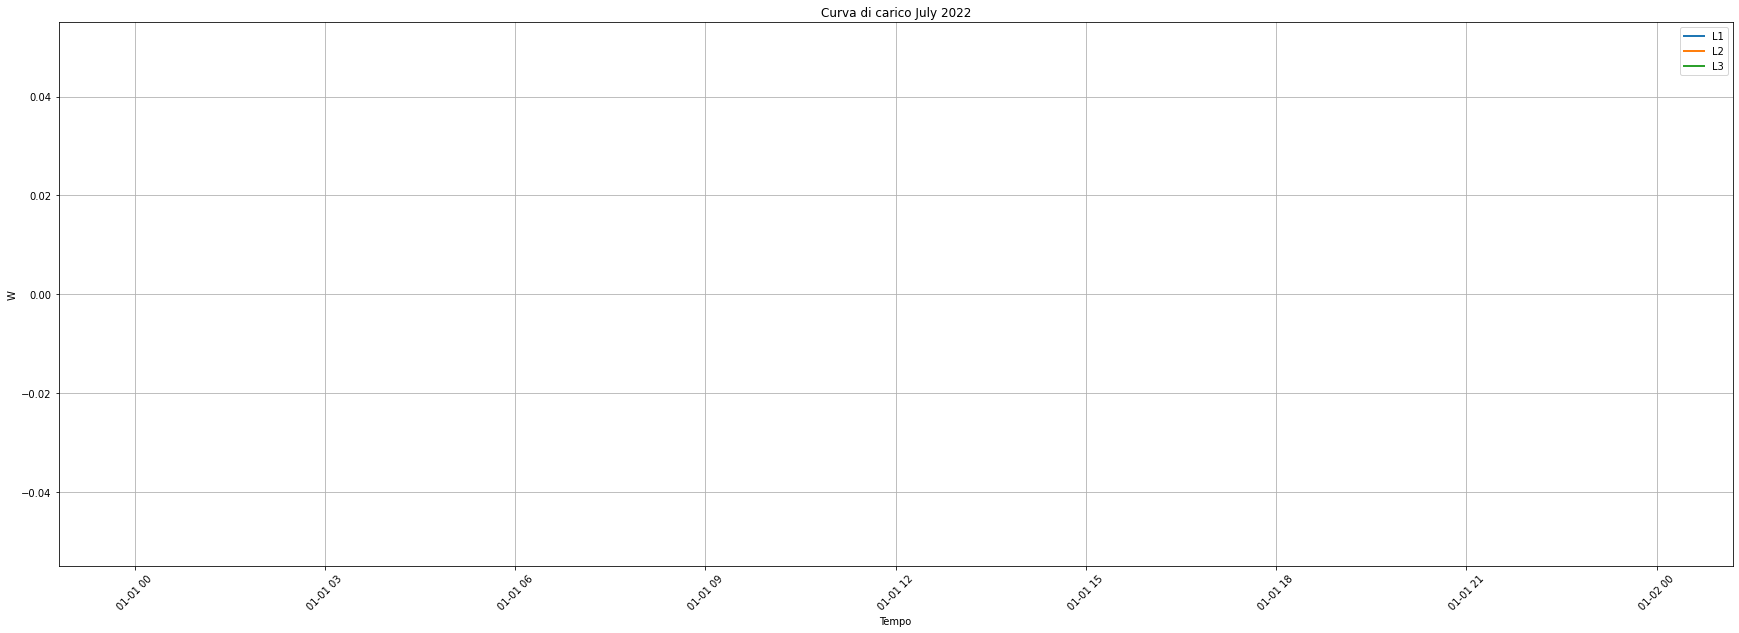

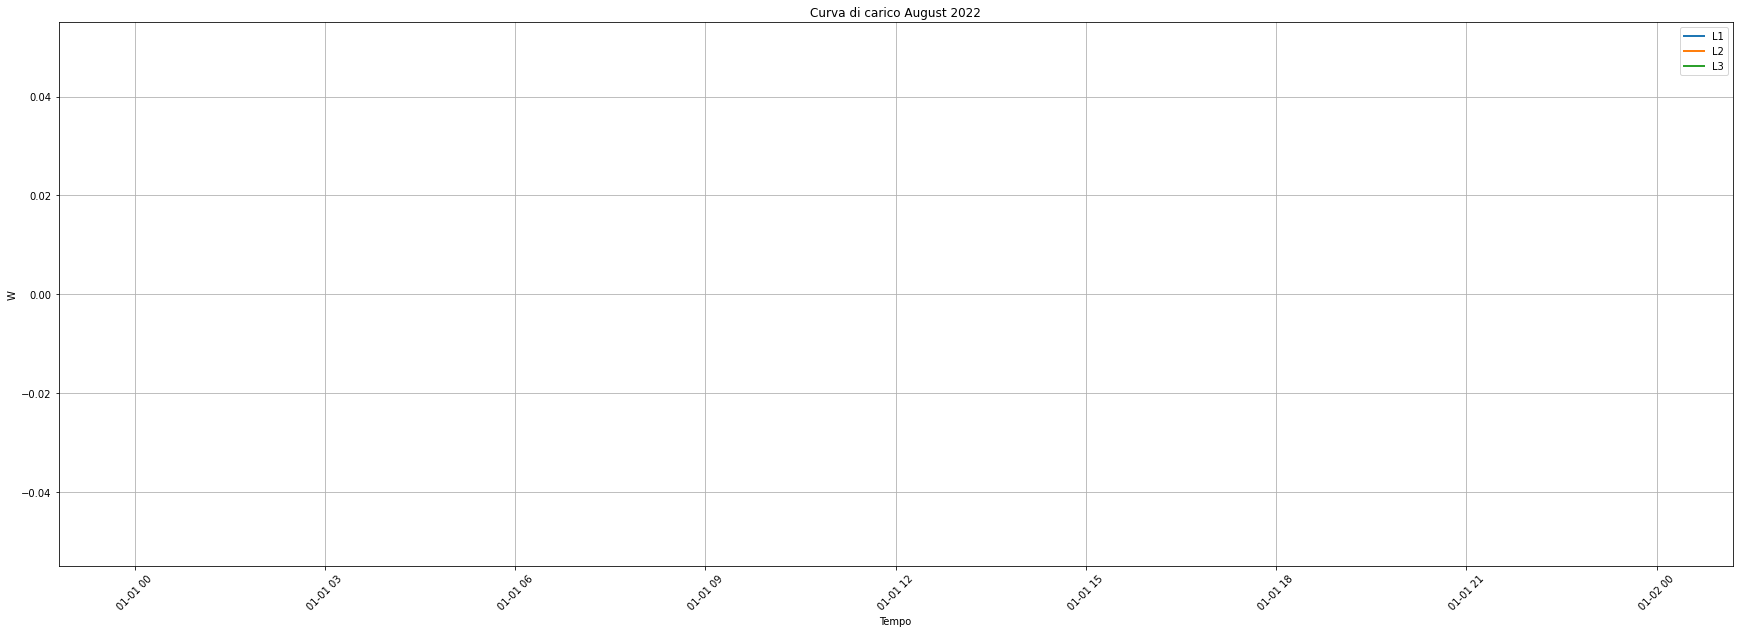

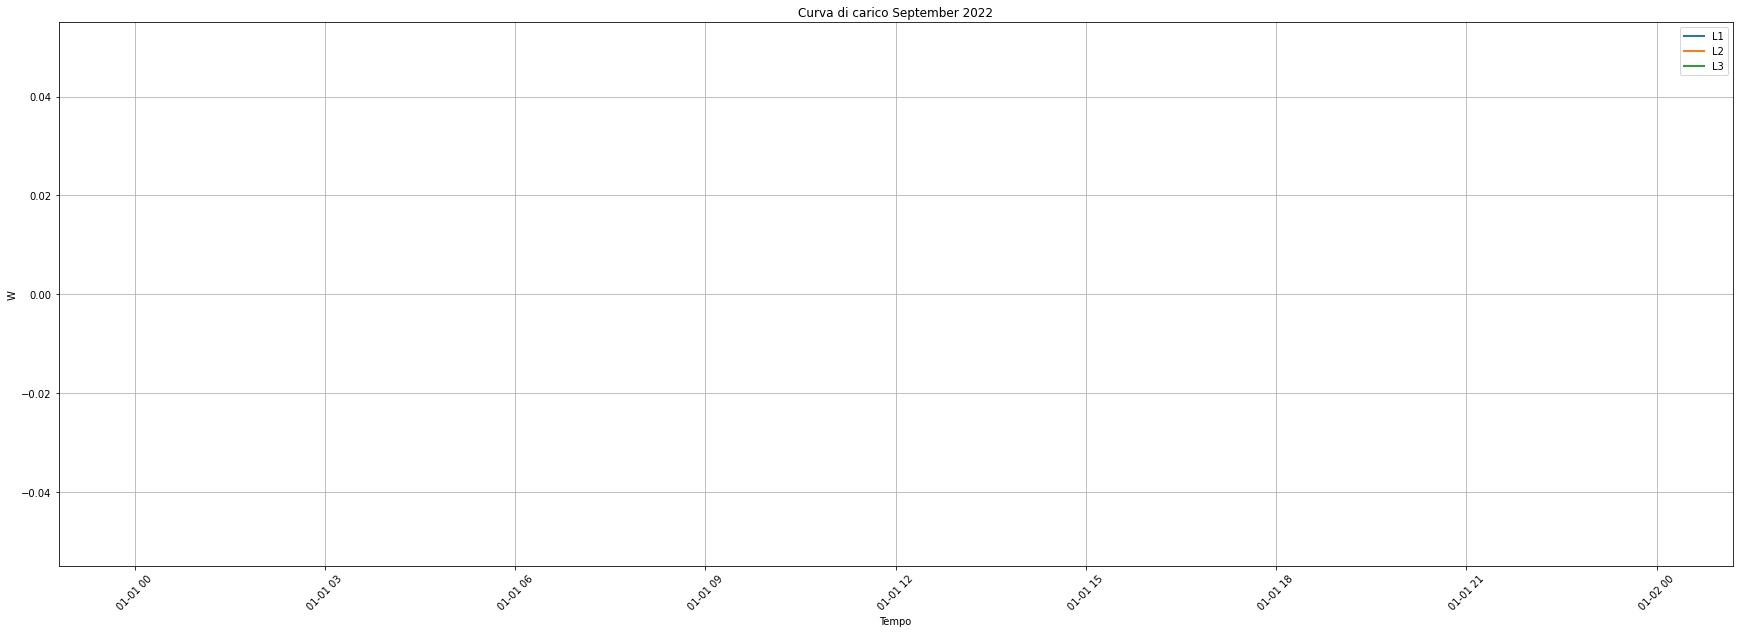

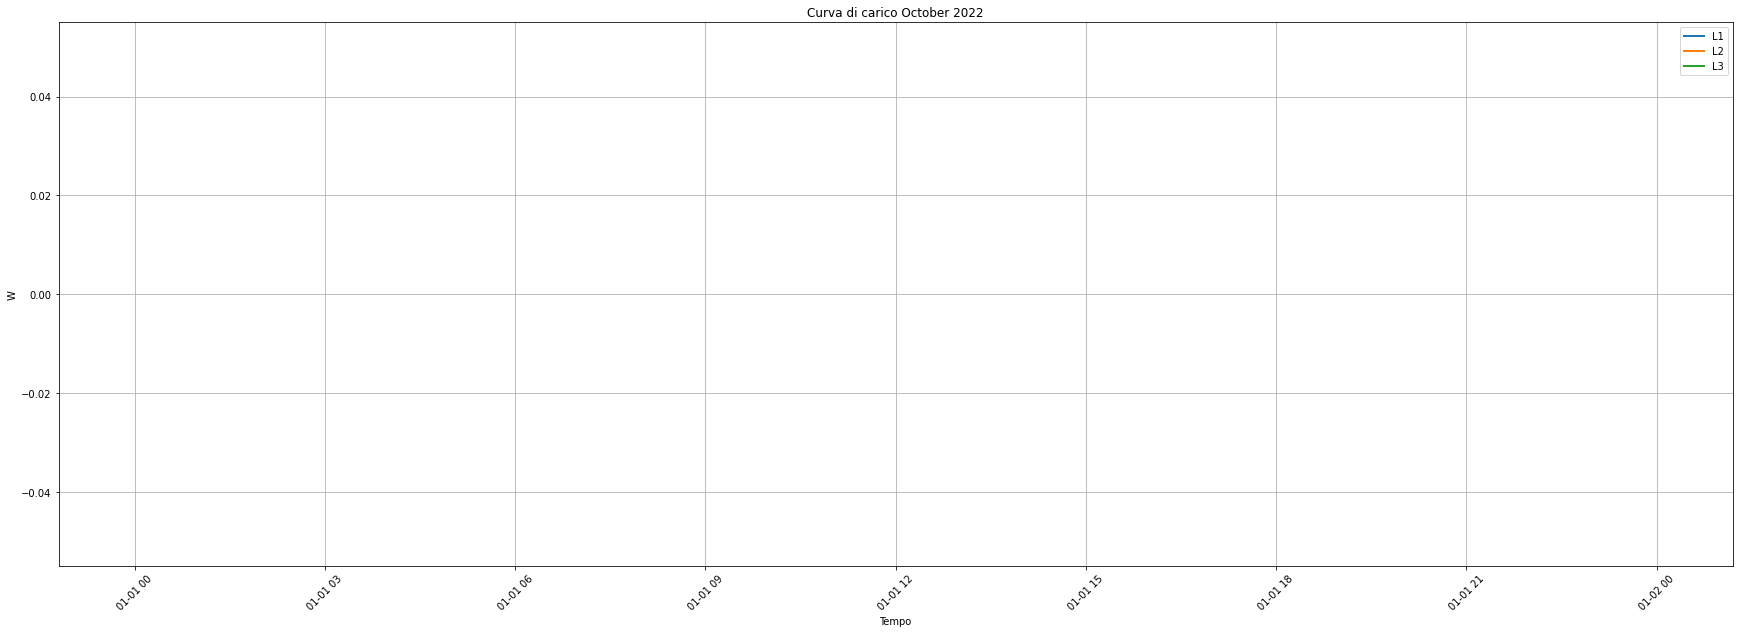

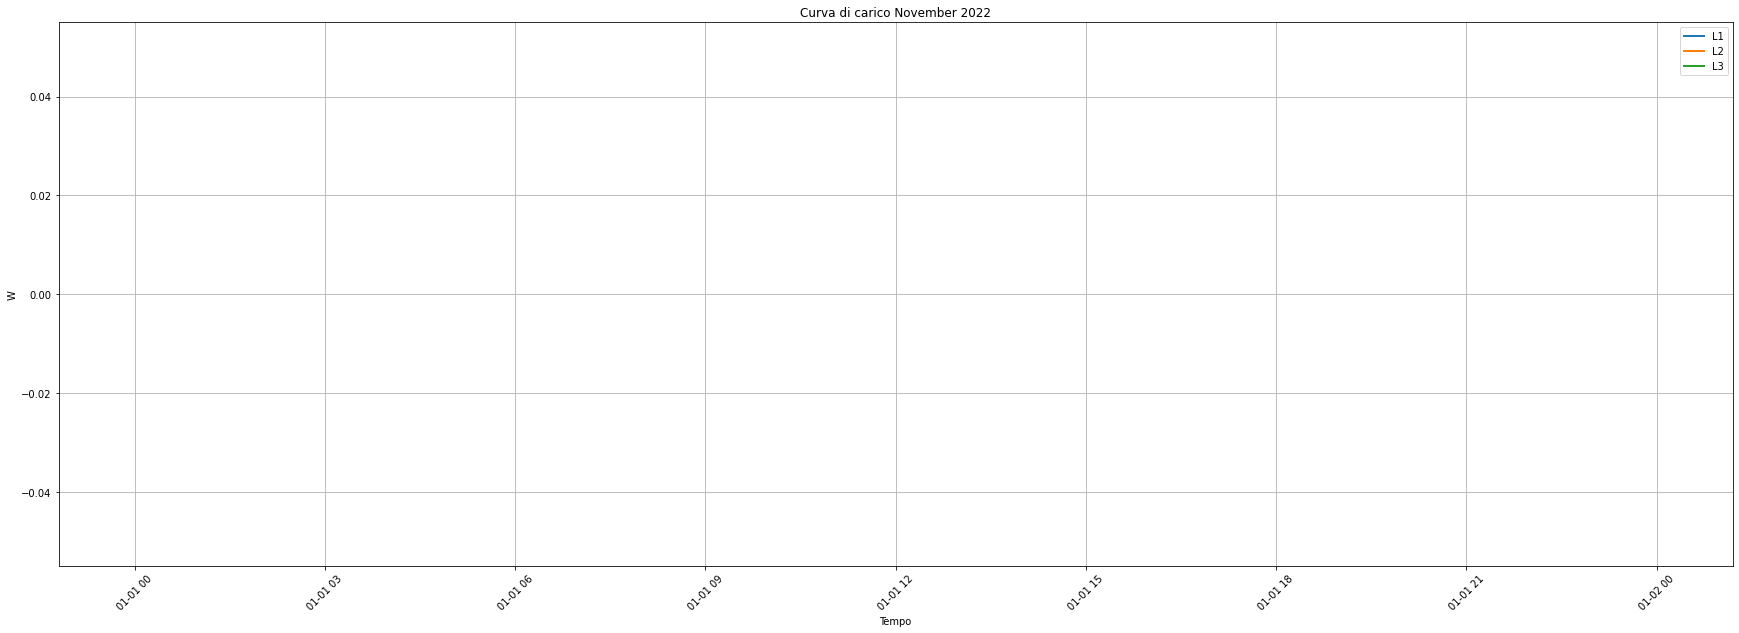

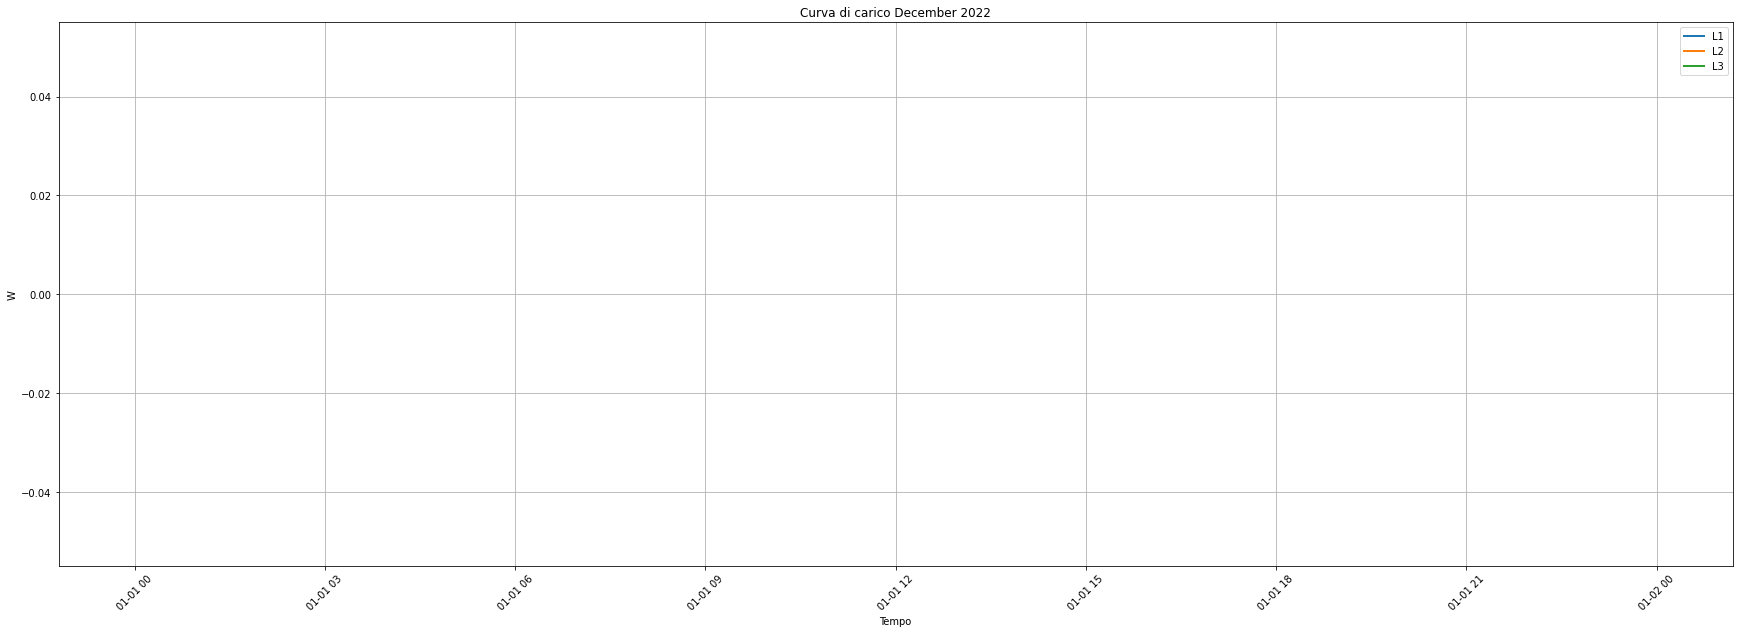

In [70]:
fields = ["L1", "L2", "L3"]
year = 2022
for year in range(2020,2023):
    for month in range(1,13):
        start_point = datetime(year, month, 1, 0)
        end_point = datetime(year, month, calendar.monthrange(year, month)[1], 23)
        title = "Curva di carico " + calendar.month_name[month] + " " + str(year)
        xlabel = "Tempo"
        ylabel = "W"
        dim = (30,10)
        plot_distribution(df_sum_loads, fields, start_point, end_point, dim, title, xlabel, ylabel)

# Analisi Feature

In [1]:
import numpy as np
from datetime import datetime
import matplotlib.pyplot as plt
import os
import pandas as pd
import calendar

In [43]:
plot_path = "Plot"
dataset_path = os.path.join("..", "Preprocessing", "Dataset", "dataset_training.csv")
df = pd.read_csv(dataset_path, index_col="Time")
df.index = pd.to_datetime(df.index)
fields = ["L1", "L2", "L3"]

In [48]:
def scatter_plot(df, x, y, title, xlabel, ylabel, dim):
    df_tmp = df.groupby([x, y]).size().reset_index(name="Count")

    plt.figure(figsize=dim) 
    plt.grid()

    plt.title(title)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)

    sns.scatterplot(data=df_tmp, x=x, y=y, size="Count", sizes=(50, 500), edgecolor="white", alpha=0.2)

    plt.xticks(rotation=45)
    
    plt.legend(loc="upper right")
    
    plt.show()

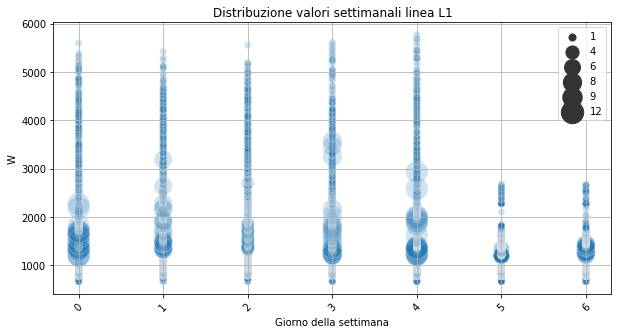

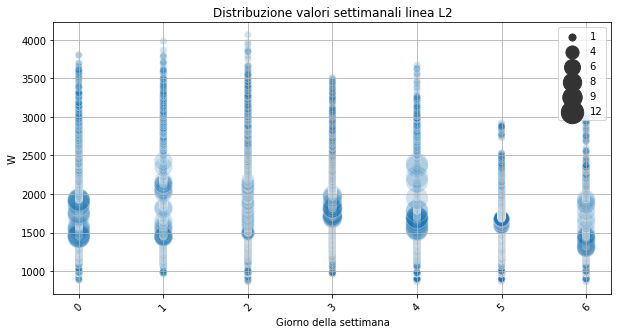

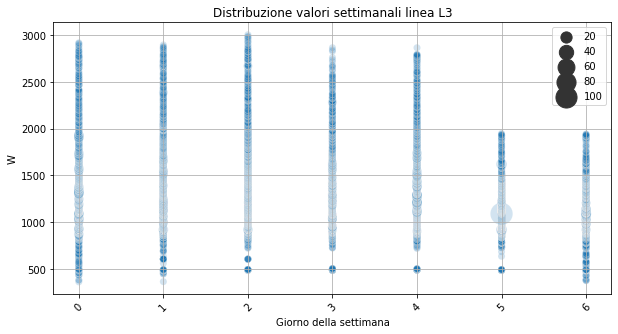

In [49]:
for field in fields:
    title = "Distribuzione valori settimanali linea " + field
    xlabel = "Giorno della settimana"
    ylabel = "W"
    dim = (10,5)
    y = field
    x = "DayOfWeek"
    scatter_plot(df, x, y, title, xlabel, ylabel, dim)

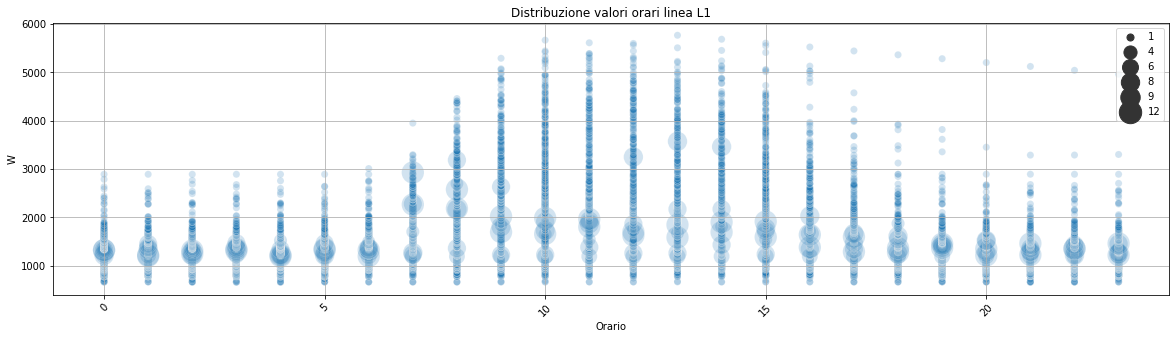

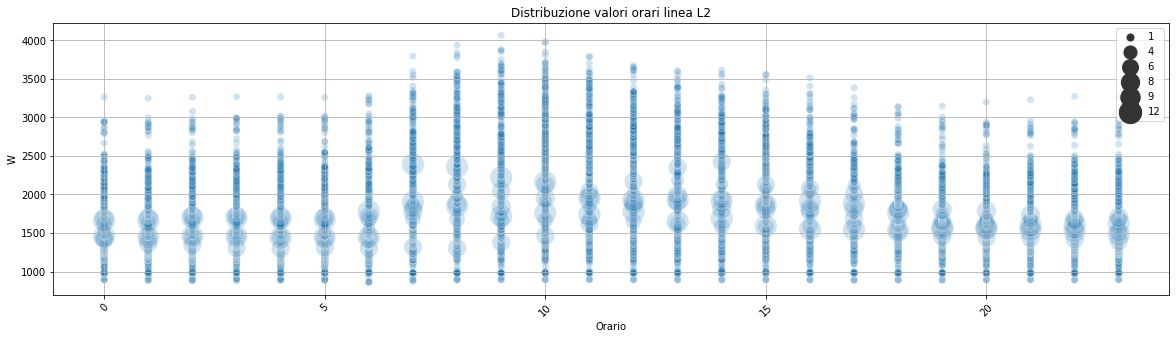

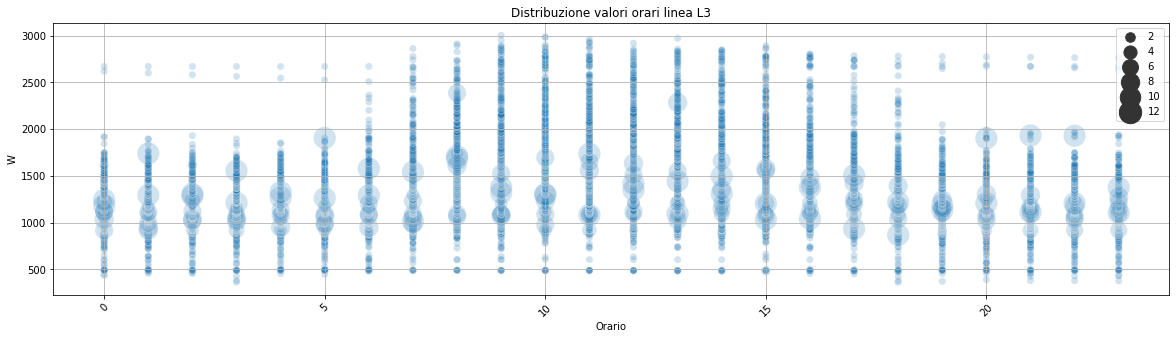

In [50]:
for field in fields:
    title = "Distribuzione valori orari linea " + field
    xlabel = "Orario"
    ylabel = "W"
    dim = (20,5)
    y = field
    x = "Hour"
    scatter_plot(df, x, y, title, xlabel, ylabel, dim)

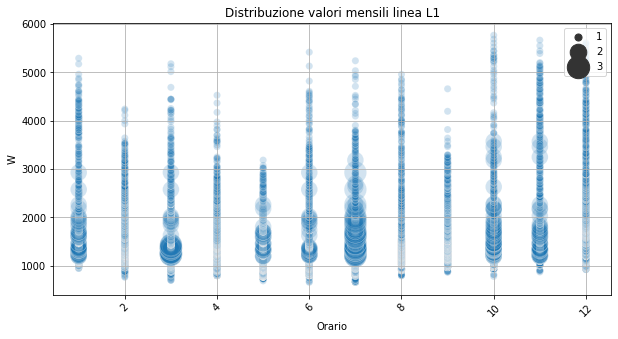

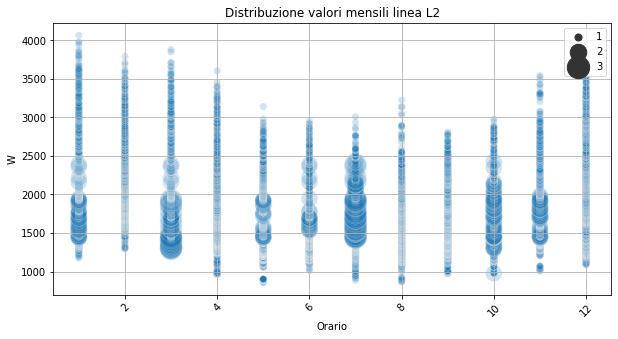

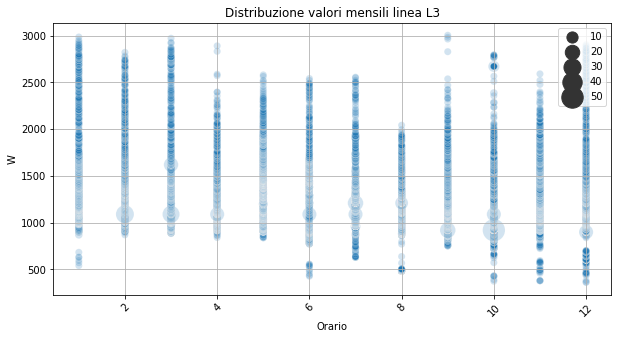

In [51]:
for field in fields:
    title = "Distribuzione valori mensili linea " + field
    xlabel = "Orario"
    ylabel = "W"
    dim = (10,5)
    y = field
    x = "Month"
    scatter_plot(df, x, y, title, xlabel, ylabel, dim)